In [1]:
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import warnings
import time
from collections import Counter
warnings.filterwarnings("ignore")


plt.style.use("fivethirtyeight")

sns.set_style({'font.sans-serif': ['simsun', 'Arial']})
sns.set_style('darkgrid', {'font.sans-serif': ['simhei', 'Arial']})
%matplotlib inline
current_date = pd.to_datetime(
    time.strftime('%Y-%m-%d', time.localtime(time.time())))

res = {}
f_res = {}
# data_path = r'../../.././Documents/赛题1数据集/'
data_path = r'../../Data/CompInfo/'

# 特征处理

## 企业评分

In [2]:
df_rating_copy = pd.read_excel(data_path+r'企业评分.xlsx')
df_rating = df_rating_copy.copy()
df_rating.info()
df_rating = df_rating.drop_duplicates()
res['企业得分'] = df_rating
df_base = pd.DataFrame({'企业编号': df_rating['企业编号']})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2995 entries, 0 to 2994
Data columns (total 2 columns):
企业编号     2995 non-null int64
企业总评分    2995 non-null float64
dtypes: float64(1), int64(1)
memory usage: 46.9 KB


In [3]:
def merge_df(df, cols, name):
    new_df_merge = df_base.merge(df, how='left', on='企业编号')
    for col in cols:
        new_df_merge[col] = new_df_merge[col].fillna(0)
    res[name] = new_df_merge

## 非财务数据处理

### 软著著作权

In [4]:
df_soft_bpk = pd.read_excel(data_path+r'软著著作权.xlsx')
df_soft = df_soft_bpk.copy()

new_df_soft = pd.DataFrame(df_soft['企业编号'].value_counts())
new_df_soft.columns = ['软著数量']
new_df_soft['企业编号'] = new_df_soft.index
new_df_soft.sort_values(by=['企业编号'], inplace=True)
new_df_soft = new_df_soft[['企业编号', '软著数量']]
new_df_soft = new_df_soft.set_index(np.arange(0, len(new_df_soft)))

new_df_soft_merge = df_base.merge(new_df_soft, how='left', on='企业编号')
new_df_soft_merge['软著数量'] = new_df_soft_merge['软著数量'].fillna(0)
res['软著著作权'] = new_df_soft_merge

### 作品著作

In [5]:
df_zuopin_bpk = pd.read_excel(data_path+r'作品著作权.xlsx')
df_zuopin = df_zuopin_bpk.copy()

new_df_zuopin = pd.DataFrame(df_zuopin['企业编号'].value_counts())
new_df_zuopin.columns = ['作品著作数量']
new_df_zuopin['企业编号'] = new_df_zuopin.index
new_df_zuopin.sort_values(by=['企业编号'], inplace=True)
new_df_zuopin = new_df_zuopin[['企业编号', '作品著作数量']]
new_df_zuopin = new_df_zuopin.set_index(np.arange(0, len(new_df_zuopin)))

new_df_zuopin_merge = df_base.merge(new_df_zuopin, how='left', on='企业编号')
new_df_zuopin_merge['作品著作数量'] = new_df_zuopin_merge['作品著作数量'].fillna(0)
res['作品著作'] = new_df_zuopin_merge

### 项目信息

In [6]:
df_project_bkp = pd.read_excel(data_path+r'项目信息.xlsx')
df_project = df_project_bkp.copy()

new_df_project = pd.DataFrame(
    df_project.loc[(df_project['运营状态'] == '运营中'), '企业编号'].value_counts())
new_df_project.columns = ['项目数量']
new_df_project['企业编号'] = new_df_project.index
new_df_project.sort_values(by=['企业编号'], inplace=True)
new_df_project = new_df_project[['企业编号', '项目数量']]
new_df_project = new_df_project.set_index(np.arange(0, len(new_df_project)))

new_df_project_merge = df_base.merge(new_df_project, how='left', on='企业编号')
new_df_project_merge['项目数量'] = new_df_project_merge['项目数量'].fillna(0)
res['项目信息'] = new_df_project_merge

### 纳税A级年份

In [7]:
df_nashuiyear_bkp = pd.read_excel(data_path+r'纳税A级年份.xlsx')
df_nashuiyear = df_nashuiyear_bkp.copy()

new_df_nashuiyear = df_nashuiyear.groupby(['企业编号', '纳税A级年份'])[
    '纳税A级年份'].count().unstack()

new_df_nashuiyear['企业编号'] = new_df_nashuiyear.index
new_df_nashuiyear = new_df_nashuiyear[['企业编号', 2014, 2015, 2016, 2017]]
columns = {'企业编号': '企业编号', 2014: '纳税A级年份_2014', 2015: '纳税A级年份_2015',
           2016: '纳税A级年份_2016', 2017: '纳税A级年份_2017'}
columns = ['企业编号', '纳税A级年份_2014', '纳税A级年份_2015', '纳税A级年份_2016', '纳税A级年份_2017']

new_df_nashuiyear.columns = columns
new_df_nashuiyear = new_df_nashuiyear.set_index(
    np.arange(0, len(new_df_nashuiyear))).fillna(0).astype(int)

merge_df(new_df_nashuiyear, [
         '纳税A级年份_2014', '纳税A级年份_2015', '纳税A级年份_2016', '纳税A级年份_2017'], '纳税A级年份')

### 资质认证

In [8]:
df_zizhi_bkp = pd.read_excel(data_path+r'资质认证.xlsx')
df_zizhi = df_zizhi_bkp.copy()

status = ['有效', '延续', '变更', '正常', '新立']
new_df_zizhi = df_zizhi.loc[(df_zizhi['有效期截至日期'].notnull())]
new_df_zizhi = new_df_zizhi.loc[(new_df_zizhi['状态'].notnull())]
new_df_zizhi['有效期截至日期'] = pd.to_datetime(new_df_zizhi['有效期截至日期'])

new_df_zizhi = new_df_zizhi.loc[(new_df_zizhi['有效期截至日期'] > current_date)]

new_df_zizhi = new_df_zizhi.loc[(
    new_df_zizhi['状态'].str.contains('[有效|延续|变更|正常|新立]'))]

new_df_zizhi_count = pd.DataFrame(new_df_zizhi['企业编号'].value_counts())
new_df_zizhi_count.columns = ['资质证书数量']
new_df_zizhi_count['企业编号'] = new_df_zizhi_count.index
new_df_zizhi_count.sort_values(by=['企业编号'], inplace=True)

new_df_zizhi_count = new_df_zizhi_count[['企业编号', '资质证书数量']]
new_df_zizhi_count = new_df_zizhi_count.set_index(
    np.arange(0, len(new_df_zizhi_count)))

merge_df(new_df_zizhi_count, ['资质证书数量'], '资质认证')

### 产品

In [9]:
df_product = pd.read_excel(data_path+r'产品.xlsx')
new_df_product = df_product.groupby(
    ['企业编号', '产品类型'])['产品类型'].count().unstack()

new_df_product['企业编号'] = new_df_product.index
columns = ['企业编号', 'android', 'ios', 'miniapp', 'website', 'wechat', 'weibo']
new_df_product = pd.DataFrame(new_df_product, columns=columns)
new_df_product = new_df_product.set_index(np.arange(0, len(new_df_product)))

merge_df(new_df_product, ['android', 'ios',
                          'miniapp', 'website', 'wechat', 'weibo'], '产品')

### 专利

In [10]:
df_zhuanli = pd.read_excel(data_path+r'专利.xlsx')
df_zhuanli['专利类型'] = df_zhuanli['专利类型'].str.replace('更正', '', regex=True)

df_zhuanli['授权公告日'] = df_zhuanli['授权公告日'].str.replace(
    r'[^0-9\-]', '', regex=True)
df_zhuanli['申请日'] = df_zhuanli['申请日'].str.replace(r'[^0-9\-]', '', regex=True)

df_zhuanli['授权公告日'] = pd.to_datetime(df_zhuanli['授权公告日'])
df_zhuanli['申请日'] = pd.to_datetime(df_zhuanli['申请日'])

tmp1 = df_zhuanli.loc[(df_zhuanli['专利类型'] == '发明专利')]
tmp1 = tmp1.loc[(abs(tmp1['申请日'].sub(current_date, axis=0).dt.days)/365) <= 20]

tmp2 = df_zhuanli.loc[(df_zhuanli['专利类型'] == '发明公布')]
tmp2 = tmp2.loc[(abs(tmp2['申请日'].sub(current_date, axis=0).dt.days)/365) <= 20]

tmp3 = df_zhuanli.loc[(df_zhuanli['专利类型'] == '发明授权')]
tmp3 = tmp3.loc[(abs(tmp3['申请日'].sub(current_date, axis=0).dt.days)/365) <= 20]

tmp4 = df_zhuanli.loc[(df_zhuanli['专利类型'] == '外观设计')]
tmp4 = tmp4.loc[(abs(tmp4['申请日'].sub(current_date, axis=0).dt.days)/365) <= 10]

tmp5 = df_zhuanli.loc[(df_zhuanli['专利类型'] == '实用新型')]
tmp5 = tmp5.loc[(abs(tmp5['申请日'].sub(current_date, axis=0).dt.days)/365) <= 10]

filter_df_zhuanli = pd.concat([tmp1, tmp2, tmp3, tmp4, tmp5])

filter_df_zhuanli = filter_df_zhuanli.drop(columns=['授权公告日', '申请日'])
new_df_zhuanli = filter_df_zhuanli.groupby(
    ['企业编号', '专利类型'])['专利类型'].count().unstack()
new_df_zhuanli['企业编号'] = new_df_zhuanli.index
columns = ['企业编号', '发明专利', '发明公布', '发明授权', '外观设计', '实用新型']
new_df_zhuanli = pd.DataFrame(new_df_zhuanli, columns=columns)
new_df_zhuanli = new_df_zhuanli.set_index(np.arange(0, len(new_df_zhuanli)))

merge_df(new_df_zhuanli, ['发明专利', '发明公布', '发明授权', '外观设计', '实用新型'], '专利')

### 竞品

In [11]:
df_jingpin_bkp = pd.read_excel(data_path+r'竞品.xlsx')
df_jingpin = df_jingpin_bkp.copy()

df_jingpin = df_jingpin.loc[(df_jingpin['竞品运营状态'] == '运营中')]
df_jingpin = df_jingpin.loc[(df_jingpin['竞品的标签'].notnull())]

new_df_jingpin = pd.DataFrame(df_jingpin['企业编号'].value_counts())
new_df_jingpin.columns = ['竞品数量']
new_df_jingpin['企业编号'] = new_df_jingpin.index
new_df_jingpin.sort_values(by=['企业编号'], inplace=True)
new_df_jingpin = new_df_jingpin[['企业编号', '竞品数量']]
new_df_jingpin = new_df_jingpin.set_index(np.arange(0, len(new_df_jingpin)))

merge_df(new_df_jingpin, ['竞品数量'], '竞品')

### 招投标

In [12]:
df_zhaotoubiao_bkp = pd.read_excel(data_path+r'招投标.xlsx')
df_zhaotoubiao = df_zhaotoubiao_bkp.copy()

new_df_zhaotoubiao = df_zhaotoubiao.groupby(
    ['企业编号', '中标或招标'])['中标或招标'].count().unstack()


new_df_zhaotoubiao['企业编号'] = new_df_zhaotoubiao.index
new_df_zhaotoubiao = new_df_zhaotoubiao[['企业编号', '中标', '招标']]
new_df_zhaotoubiao = new_df_zhaotoubiao.set_index(
    np.arange(0, len(new_df_zhaotoubiao)))
new_df_zhaotoubiao = new_df_zhaotoubiao.drop(['招标'], axis=1)

merge_df(new_df_zhaotoubiao, ['中标'], '招投标')

### 购地

In [13]:
df_goudi1_bkp = pd.read_excel(data_path+'购地-地块公示.xlsx')
df_goudi2_bkp = pd.read_excel(data_path+'购地-市场交易-土地转让.xlsx')
df_goudi3_bkp = pd.read_excel(data_path+'购地-房地产大企业购地情况.xlsx')
df_goudi4_bkp = pd.read_excel(data_path+'购地-房地产大地块出让情况.xlsx')
df_goudi5_bkp = pd.read_excel(data_path+'购地-市场交易-土地抵押.xlsx')
df_goudi6_bkp = pd.read_excel(data_path+'购地-结果公告.xlsx')
df_goudi1 = df_goudi1_bkp.copy()
df_goudi2 = df_goudi2_bkp.copy()
df_goudi3 = df_goudi3_bkp.copy()
df_goudi4 = df_goudi4_bkp.copy()
df_goudi5 = df_goudi5_bkp.copy()
df_goudi6 = df_goudi6_bkp.copy()
# print(df_goudi1.info(), '\n地块公示')
# print('=================')
# print(df_goudi3.info(), '\n房地产大企业购地情况')
# print('=================')
# print(df_goudi2.info(), '\n市场交易-土地转让')
# print('=================')
# print(df_goudi4.info(), '\n房地产大地块出让情况')
# print('=================')
# print(df_goudi5.info(), '\n市场交易-土地抵押')
# print('=================')
# print(df_goudi6.info(), '\n结果公告')

In [14]:
df_goudi1['土地面积（公顷）'] = df_goudi1['土地面积（公顷）'].astype(float)
goudi_grouped = df_goudi1.groupby(['企业编号'])

agg_goudi_func = {
    '土地面积（公顷）': ['sum', 'min', 'max']
}
goudi_grouped_info = goudi_grouped.agg(agg_goudi_func)
goudi_grouped_info.columns = [
    '_'.join(col).strip() for col in goudi_grouped_info.columns.values]
goudi_grouped_info['企业编号'] = goudi_grouped_info.index
goudi_grouped_info = goudi_grouped_info.set_index(
    np.arange(0, len(goudi_grouped_info)))

df_jine = df_goudi5.loc[(df_goudi5['评估金额(万元)'].notnull())]

df_jine['评估金额(亿元)'] = df_jine['评估金额(万元)'].astype(float)/10000
goudi_grouped_jine = df_jine.groupby(['企业编号'])

agg_goudi_func = {
    '评估金额(亿元)': ['sum', 'max']
}
goudi_grouped_jine_info = goudi_grouped_jine.agg(agg_goudi_func)
goudi_grouped_jine_info.columns = [
    '_'.join(col).strip() for col in goudi_grouped_jine_info.columns.values]
goudi_grouped_jine_info['企业编号'] = goudi_grouped_jine_info.index
goudi_grouped_jine_info = goudi_grouped_jine_info.set_index(
    np.arange(0, len(goudi_grouped_jine_info)))

merge_goudi = goudi_grouped_info.merge(
    goudi_grouped_jine_info, how='outer', on='企业编号')
merge_goudi['土地面积评估均值(公顷/亿元)'] = (merge_goudi['土地面积（公顷）_sum'] /
                                  merge_goudi['评估金额(亿元)_sum']).replace(np.inf, np.nan)
cols = ['企业编号', '土地面积（公顷）_sum', '土地面积（公顷）_min', '土地面积（公顷）_max',
        '评估金额(亿元)_sum', '评估金额(亿元)_max', '土地面积评估均值(公顷/亿元)']
merge_goudi = merge_goudi[cols]
diyacishu = pd.DataFrame()
diyacishu['抵押次数'] = df_goudi5.loc[(df_goudi5['评估金额(万元)'].notnull())].groupby(['企业编号'])[
    '企业编号'].count()

goudicishu = pd.DataFrame()
goudicishu['购地次数'] = df_goudi1.loc[(df_goudi1['土地面积（公顷）'].notnull())].groupby(['企业编号'])[
    '企业编号'].count()
goudicishu = goudicishu.merge(
    diyacishu, how='outer', on='企业编号')
merge_goudi = merge_goudi.merge(goudicishu, how='outer', on='企业编号')
merge_goudi.columns = ['企业编号', '企业购地面积（公顷）_sum', '企业购地面积（公顷）_min', '企业购地面积（公顷）_max',
                       '土地评估金额(亿元)_sum', '土地评估金额(亿元)_max', '土地面积评估均值(公顷/亿元)', '购地次数', '抵押次数']

merge_df(merge_goudi, ['企业购地面积（公顷）_sum', '企业购地面积（公顷）_min', '企业购地面积（公顷）_max',
                       '土地评估金额(亿元)_sum', '土地评估金额(亿元)_max', '土地面积评估均值(公顷/亿元)', '购地次数', '抵押次数'], '企业购地')

### 年报-对外投资信息

In [15]:
df_nianbao_touzi_bkp = pd.read_excel(data_path+r'年报-对外投资信息.xlsx')
df_nianbao_touzi = df_nianbao_touzi_bkp.copy()
df_nianbao_touzi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93369 entries, 0 to 93368
Data columns (total 4 columns):
企业编号    93369 non-null int64
投资金额    1456 non-null float64
投资占比    1456 non-null float64
年报年份    93367 non-null float64
dtypes: float64(3), int64(1)
memory usage: 2.8 MB


In [16]:
df_nianbao_touzi_clean = df_nianbao_touzi.loc[(
    df_nianbao_touzi['投资金额'].notnull())]

agg_func = {
    '投资金额': ['sum', 'min', 'max'],
    '企业编号': ['count']
}
df_nianbao_touzi_group = df_nianbao_touzi_clean.groupby(
    ['企业编号']).agg(agg_func)
df_nianbao_touzi_group.columns = [
    '_'.join(col).strip() for col in df_nianbao_touzi_group.columns.values]
df_nianbao_touzi_group['企业编号'] = df_nianbao_touzi_group.index
df_nianbao_touzi_group.rename(columns={'企业编号_count': '投资次数'}, inplace=True)
df_nianbao_touzi_group = df_nianbao_touzi_group.set_index(
    np.arange(0, len(df_nianbao_touzi_group)))

merge_df(df_nianbao_touzi_group, ["投资金额_sum",
                                  "投资金额_min", "投资金额_max", "投资次数"], '年报-对外投资信息')

### 年报-股东股权转让

In [17]:
df_nianbao_gudongguquanzhuanrang_bkp = pd.read_excel(
    data_path+r'年报-股东股权转让.xlsx')

df_nianbao_gudongguquanzhuanrang = df_nianbao_gudongguquanzhuanrang_bkp.copy()

df_nianbao_gudongguquanzhuanrang['变更前股权比例'] = df_nianbao_gudongguquanzhuanrang['变更前股权比例'].str.rstrip(
    '%').astype(float)
df_nianbao_gudongguquanzhuanrang_clean = df_nianbao_gudongguquanzhuanrang.loc[(
    df_nianbao_gudongguquanzhuanrang['变更后股权比例'].notnull())]
df_nianbao_gudongguquanzhuanrang_clean['变更后股权比例'] = df_nianbao_gudongguquanzhuanrang_clean[~df_nianbao_gudongguquanzhuanrang_clean["变更后股权比例"].str.contains(
    '-')]['变更后股权比例'].str.rstrip('%').astype(float)

df_nianbao_gudongguquanzhuanrang_clean['变更股权比例差'] = df_nianbao_gudongguquanzhuanrang_clean['变更后股权比例'] - \
    df_nianbao_gudongguquanzhuanrang_clean['变更前股权比例']
# df_nianbao_gudongguquanzhuanrang_clean.head(n=3)
agg_func = {
    '变更股权比例差': ['sum', 'max', 'min'],
    '变更前股权比例': ['sum'],
    '变更后股权比例': ['sum'],
    '企业编号': ['count']
}
df_nianbao_gudongguquanzhuanrang_clean_new = df_nianbao_gudongguquanzhuanrang_clean.groupby([
                                                                                            '企业编号']).agg(agg_func)
df_nianbao_gudongguquanzhuanrang_clean_new.columns = [
    '_'.join(col) for col in df_nianbao_gudongguquanzhuanrang_clean_new.columns.values]
df_nianbao_gudongguquanzhuanrang_clean_new.columns = [
    '变更股权比例差_sum', '变更股权比例差_max', '变更股权比例差_min', '变更前股权比例_sum', '变更后股权比例_sum', '变更次数']
df_nianbao_gudongguquanzhuanrang_clean_new['企业编号'] = df_nianbao_gudongguquanzhuanrang_clean_new.index
df_nianbao_gudongguquanzhuanrang_clean_new = df_nianbao_gudongguquanzhuanrang_clean_new.set_index(
    np.arange(0, len(df_nianbao_gudongguquanzhuanrang_clean_new)))

merge_df(df_nianbao_gudongguquanzhuanrang_clean_new, [
         '变更股权比例差_sum', '变更股权比例差_max', '变更股权比例差_min', '变更前股权比例_sum', '变更后股权比例_sum', '变更次数'], '年报-股东股权转让')

### 工商基本信息表

In [18]:
df_gongshangxinxi_bkp = pd.read_excel(data_path+r'工商基本信息表.xlsx')
df_gongshangxinxi = df_gongshangxinxi_bkp.copy()

df_gongshangxinxi['经营状态'] = df_gongshangxinxi['经营状态'].str.replace(
    '存续（在营、开业、在册）', '开业')
df_gongshangxinxi['经营状态'] = df_gongshangxinxi['经营状态'].str.replace(
    '在业', '开业')
df_gongshangxinxi['经营状态'] = df_gongshangxinxi['经营状态'].str.replace(
    '在营（开业）企业', '开业')

zhuangtai = df_gongshangxinxi.groupby(['企业编号', '经营状态'])[
    '经营状态'].count().unstack().fillna(0).astype(int)
zhuangtai['企业编号'] = zhuangtai.index
zhuangtai['开业'] = zhuangtai['存续']+zhuangtai['存续(在营、开业、在册)']+zhuangtai['开业']
zhuangtai = pd.DataFrame(
    {'企业编号': zhuangtai['企业编号'], '经营状态_开业': zhuangtai['开业'], '经营状态_迁出': zhuangtai['迁出']})
# res['经营状态'] = zhuangtai
zhuangtai = zhuangtai.set_index(np.arange(0, len(zhuangtai)))
zhuangtai.loc[(zhuangtai['经营状态_开业'] == 0)]
zhuangtai = zhuangtai.drop(['经营状态_迁出'], axis=1)
zhuangtai.rename(columns={'经营状态_开业': '经营状态'}, inplace=True)
zhuangtai_merge = df_base.merge(zhuangtai, how='left', on='企业编号')
zhuangtai_merge['经营状态'] = zhuangtai_merge['经营状态'].fillna(
    zhuangtai_merge['经营状态'].mode())
res['经营状态'] = zhuangtai_merge

df_hangye = df_gongshangxinxi.groupby(['企业编号', '行业大类（代码）'])[
    '行业大类（代码）'].count().unstack().fillna(0).astype(int)
df_hangye.columns = ['行业大类_'+col for col in df_hangye.columns.values]
df_hangye['企业编号'] = df_hangye.index
# res['行业大类'] = df_hangye
df_hangye = df_hangye.set_index(np.arange(0, len(df_hangye)))
df_hangye_merge = df_base.merge(df_hangye, how='left', on='企业编号')
# df_hangye_merge.columns
hangye_cols = ['行业大类_A', '行业大类_B', '行业大类_C', '行业大类_D', '行业大类_E', '行业大类_F',
               '行业大类_G', '行业大类_H', '行业大类_I', '行业大类_J', '行业大类_K', '行业大类_L', '行业大类_M',
               '行业大类_N', '行业大类_O', '行业大类_P', '行业大类_Q', '行业大类_R']
for col in hangye_cols:
    df_hangye_merge[col] = df_hangye_merge[col].fillna(0)
res['行业大类'] = df_hangye_merge

df_gongshangxinxi['是否上市'] = df_gongshangxinxi['是否上市'].str.replace('Y', '1')
df_gongshangxinxi['是否上市'] = df_gongshangxinxi['是否上市'].str.replace('N', '0')
df_gongshangxinxi['是否上市'] = df_gongshangxinxi['是否上市'].astype(int)

df_gongshangxinxi.loc[df_gongshangxinxi['注册资本币种(正则)'] == '美元', [
    '注册资本（万元）']] = df_gongshangxinxi.loc[df_gongshangxinxi['注册资本币种(正则)'] == '美元', ['注册资本（万元）']]*8.2777
df_gongshangxinxi.loc[df_gongshangxinxi['注册资本币种(正则)'] == '美元']

temp = pd.DataFrame({'企业编号': df_gongshangxinxi['企业编号'],
                     '注册资本（万元）': df_gongshangxinxi['注册资本（万元）'],
                     '是否上市': df_gongshangxinxi['是否上市']})

temp_merge = df_base.merge(temp, how='left', on='企业编号')
temp_merge['注册资本（万元）'] = temp_merge['注册资本（万元）'].fillna(
    temp_merge['注册资本（万元）'].mean())
temp_merge['是否上市'] = temp_merge['是否上市'].fillna(temp_merge['是否上市'].mode())
res['注册资本_是否上市'] = temp_merge

df_gongshangxinxi['成立日期'] = pd.to_datetime(df_gongshangxinxi['成立日期'])
df_gongshangxinxi['成立年数'] = round(abs(df_gongshangxinxi['成立日期'].sub(
    current_date, axis=0).dt.days)/365).astype(int)

df_gongshangxinxi.loc[(df_gongshangxinxi['注销原因'].notnull()), '是否注销'] = 1

waiqi = df_gongshangxinxi.groupby(['企业编号', '类型'])[
    '类型'].count().unstack().fillna(0).astype(int)

waiqi['企业编号'] = waiqi.index
merge_waiqi_zhuxiao_nianshu = pd.DataFrame({
    '是否注销': df_gongshangxinxi['是否注销'],
    '是否外企': waiqi['外企'],
    '企业编号': waiqi['企业编号'],
    '成立年数': df_gongshangxinxi['成立年数']
})

waiqi_zhuxiao_nianshu = df_base.merge(
    merge_waiqi_zhuxiao_nianshu, how='left', on='企业编号')
waiqi_zhuxiao_nianshu['是否注销'].fillna(
    waiqi_zhuxiao_nianshu['是否注销'].mode()[0], inplace=True)
waiqi_zhuxiao_nianshu['是否外企'].fillna(
    waiqi_zhuxiao_nianshu['是否外企'].mode()[0], inplace=True)
waiqi_zhuxiao_nianshu['成立年数'].fillna(int(
    waiqi_zhuxiao_nianshu['成立年数'].mean()), inplace=True)
res['外企_注销_成立年数'] = waiqi_zhuxiao_nianshu

### 年报企业基本信息

In [19]:
df_qiyejiben_bkp = pd.read_excel(data_path+r'年报-企业基本信息.xlsx')
df_qiyejiben = df_qiyejiben_bkp.copy()

jingyingzhaungtai = df_qiyejiben.groupby(['企业编号', '企业经营状态'])[
    '企业经营状态'].count().unstack().fillna(0).astype(int)
jingyingzhaungtai['企业编号'] = jingyingzhaungtai.index
jingyingzhaungtai['开业'] = jingyingzhaungtai['开业'] + \
    jingyingzhaungtai['开业/正常经营'] + \
    jingyingzhaungtai['正常开业']+jingyingzhaungtai['存续']
jingying = pd.DataFrame({
    '企业编号': jingyingzhaungtai['企业编号'],
    '停业': jingyingzhaungtai['停业'],
    '其他': jingyingzhaungtai['其他'],
    '开业': jingyingzhaungtai['开业'],
    '歇业': jingyingzhaungtai['歇业'],
    '清算': jingyingzhaungtai['清算'],
})
jingying = jingying.set_index(np.arange(0, len(jingying)))

merge_df(jingying, [
         '停业', '其他', '开业', '歇业', '清算'], '企业基本信息经营状态')

### 年报-的对外提供保证担保信息

In [20]:
df_duiwaidanbao_bkp = pd.read_excel(data_path+r'年报-的对外提供保证担保信息.xlsx')
df_duiwaidanbao = df_duiwaidanbao_bkp.copy()

df_duiwaidanbao_c = df_duiwaidanbao.copy()
df_duiwaidanbao_c.drop(
    ['保证担保的范围', '保证的期间', '保证的方式', '主债权种类', '履行债务的期限'], axis=1, inplace=True)
df_duiwaidanbao_c = df_duiwaidanbao_c.loc[(
    df_duiwaidanbao_c['主债权数额'].notnull())]
df_duiwaidanbao_c['主债权数额'] = df_duiwaidanbao_c['主债权数额'].replace(
    '企业选择不公示', np.nan)
df_duiwaidanbao_c['主债权数额'] = df_duiwaidanbao_c['主债权数额'].str.extract(
    '([0-9\.]+)').astype(float)
df_duiwaidanbao_c['主债权数额'].fillna(
    df_duiwaidanbao_c['主债权数额'].mean(), inplace=True)
agg_func = {
    '主债权数额': ['sum', 'min', 'max', 'mean'],
    '企业编号': ['count']
}
df_duiwaidanbao_g = df_duiwaidanbao_c.groupby(
    ['企业编号']).agg(agg_func)
df_duiwaidanbao_g.columns = ['_'.join(col)
                             for col in df_duiwaidanbao_g.columns.values]
df_duiwaidanbao_g['企业编号'] = df_duiwaidanbao_g.index
df_duiwaidanbao_g.set_index(
    np.arange(0, len(df_duiwaidanbao_g)), inplace=True)
df_duiwaidanbao_g.rename(columns={'企业编号_count': '担保次数'}, inplace=True)

merge_df(df_duiwaidanbao_g, ['主债权数额_sum', '主债权数额_min',
                             '主债权数额_max', '主债权数额_mean', '担保次数'], '企业担保')

### 年报-网站或网点信息

In [21]:
df_wangzhan_bkp = pd.read_excel(data_path+r'年报-网站或网点信息.xlsx')
df_wangzhan = df_wangzhan_bkp.copy()

tmpdf = pd.DataFrame()
tmpdf['网站或网点数'] = df_wangzhan.groupby(['企业编号'])['企业编号'].count()
tmpdf['企业编号'] = tmpdf.index
tmpdf = tmpdf.set_index(np.arange(0, len(tmpdf)))

merge_df(tmpdf, ['网站或网点数'], '网站或网点数')

### 商标

In [22]:
df_shangbiao_bkp = pd.read_excel(data_path+r'商标.xlsx')
df_shangbiao = df_shangbiao_bkp.copy()

df_shangbiao_withdate = df_shangbiao.loc[(df_shangbiao['专用权期限结束日期'].notnull())]
df_shangbiao_withdate['专用权期限结束日期'] = pd.to_datetime(
    df_shangbiao_withdate['专用权期限结束日期'])
df_shangbiao_withdate = df_shangbiao_withdate.loc[(
    df_shangbiao_withdate['专用权期限结束日期']) > current_date]

finished = ['商标已注册',
            '注册',
            '商标注册申请完成',
            '商标续展完成',
            '商标变更完成',
            '变更商标申请人/注册人名义/地址完成',
            '商标注册申请注册公告排版完成',
            '商标转让完成',
            '出具商标注册证明完成']
df_shangbiao_withdate_clean = df_shangbiao_withdate.loc[(
    df_shangbiao_withdate['商标状态'].isin(finished))]
df_shangbiao_count = pd.DataFrame()
df_shangbiao_count['商标数量'] = df_shangbiao_withdate_clean.groupby(['企业编号'])[
    '企业编号'].count()
df_shangbiao_count['企业编号'] = df_shangbiao_count.index
df_shangbiao_count = df_shangbiao_count.set_index(
    np.arange(0, len(df_shangbiao_count)))

merge_df(df_shangbiao_count, ['商标数量'], '商标数量')

### 债券信息

In [23]:
df_operation = pd.read_excel(data_path+r'债券信息.xlsx')

df_operation['债券期限'] = pd.to_numeric(df_operation['债券期限'], errors='coerce')

agg_func = {'债券期限': ['mean', 'max', 'min', 'std'], '票面利率（%）': [
    'mean', 'max', 'min', 'std'], '计划发行总额（亿元）': ['sum', 'max', 'min', 'std']}
df_operation_new = df_operation.groupby(['企业编号']).agg(agg_func)
df_operation_new.columns = ['_'.join(col)
                            for col in df_operation_new.columns.values]
df_operation_new.columns = [
    '债券期限_mean',
    '债券期限_max',
    '债券期限_min',
    '债券期限_std',
    '票面利率（%）_mean',
    '票面利率（%）_max',
    '票面利率（%）_min',
    '票面利率（%）_std',
    '计划发行总额（亿元）_sum',
    '计划发行总额（亿元）_max',
    '计划发行总额（亿元）_min',
    '计划发行总额（亿元）_std']
df_operation_new['企业编号'] = df_operation_new.index
df_operation_new = df_operation_new.set_index(
    np.arange(0, len(df_operation_new)))

merge_df(df_operation_new, [
    '债券期限_mean',
    '债券期限_max',
    '债券期限_min',
    '债券期限_std',
    '票面利率（%）_mean',
    '票面利率（%）_max',
    '票面利率（%）_min',
    '票面利率（%）_std',
    '计划发行总额（亿元）_sum',
    '计划发行总额（亿元）_max',
    '计划发行总额（亿元）_min',
    '计划发行总额（亿元）_std'], '债券信息')

### 年报-社保信息

In [24]:
df_shebao_bkp = pd.read_excel(data_path+r'年报-社保信息.xlsx')
df_shebao = df_shebao_bkp.copy()

filter_df_shebao = df_shebao.loc[(df_shebao['城镇职工基本养老保险人数'].notnull())]
filter_df_shebao = filter_df_shebao.drop(['失业保险人数', '职工基本医疗保险人数', '工伤保险人数', '生育保险人数',
                                          '单位参加失业保险缴费基数', '单位参加职工基本医疗保险缴费基数', '单位参加工伤保险缴费基数', '单位参加生育保险缴费基数', '单位参加城镇职工基本养老保险累计欠缴金额', '单位参加失业保险累计欠缴金额',
                                          '单位参加职工基本医疗保险累计欠缴金额', '单位参加工伤保险累计欠缴金额', '单位参加生育保险累计欠缴金额'], axis=1)
A = ['单位参加城镇职工基本养老保险缴费基数', '参加城镇职工基本养老保险本期实际缴费金额', '参加失业保险本期实际缴费金额',
     '参加职工基本医疗保险本期实际缴费金额', '参加工伤保险本期实际缴费金额', '参加生育保险本期实际缴费金额']
filter_df_shebao['城镇职工基本养老保险人数'] = filter_df_shebao['城镇职工基本养老保险人数'].str.rstrip(
    '人').astype(int)

for arr in A:
    filter_df_shebao[arr] = filter_df_shebao[arr].str.rstrip(
        '万元')
    filter_df_shebao[arr] = filter_df_shebao[arr].fillna(
        '选择不公示')
    filter_df_shebao.loc[(filter_df_shebao[arr].str.contains(
        '([^0-9\.])')), arr].value_counts()
    filter_df_shebao.loc[(filter_df_shebao[arr].str.contains(
        '选择不公示')), arr] = np.nan
    filter_df_shebao[arr] = filter_df_shebao[arr].str.extract(
        '([0-9\.]+)').astype(float)*10000

filter_df_shebao1 = filter_df_shebao.copy()

filter_df_shebao1['合计'] = filter_df_shebao1['参加城镇职工基本养老保险本期实际缴费金额']+filter_df_shebao1['参加失业保险本期实际缴费金额'] + \
    filter_df_shebao1['参加职工基本医疗保险本期实际缴费金额'] + \
    filter_df_shebao1['参加工伤保险本期实际缴费金额']+filter_df_shebao1['参加生育保险本期实际缴费金额']
filter_df_shebao1.head(n=10)

,企业编号,城镇职工基本养老保险人数,单位参加城镇职工基本养老保险缴费基数,参加城镇职工基本养老保险本期实际缴费金额,参加失业保险本期实际缴费金额,参加职工基本医疗保险本期实际缴费金额,参加工伤保险本期实际缴费金额,参加生育保险本期实际缴费金额,年报年份,合计
3,1001,2652,NaN,NaN,NaN,NaN,NaN,NaN,2016.0,NaN
4,1001,39620,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,NaN
13,1003,7069,NaN,NaN,NaN,NaN,NaN,NaN,2016.0,NaN
14,1003,6915,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,NaN
18,1004,926,NaN,NaN,NaN,NaN,NaN,NaN,2016.0,NaN
19,1004,1206,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,NaN
23,1005,206,62069600.0,11479500.0,445400.0,4630200.0,126200.0,336600.0,2016.0,17017900.0
24,1005,230,49441800.0,13311700.0,491900.0,5432200.0,148100.0,395100.0,2017.0,19779000.0
28,1006,2035,NaN,NaN,NaN,NaN,NaN,NaN,2016.0,NaN
29,1006,2046,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,NaN


In [25]:
df_shebao_16 = filter_df_shebao1.loc[(filter_df_shebao['年报年份'] == 2016)]
df_shebao_17 = filter_df_shebao1.loc[(filter_df_shebao['年报年份'] == 2017)]

df_shebao_16_c = df_shebao_16.copy()
df_shebao_17_c = df_shebao_17.copy()
df_shebao_16_c = df_shebao_16_c.set_index(df_shebao_16_c['企业编号'])
df_shebao_17_c = df_shebao_17_c.set_index(df_shebao_17_c['企业编号'])
df_shebao_16_c = df_shebao_16_c.drop(['年报年份'], axis=1)
df_shebao_17_c = df_shebao_17_c.drop(['年报年份'], axis=1)
df_shebao_16_c = df_shebao_16_c.drop(['企业编号'], axis=1)
df_shebao_17_c = df_shebao_17_c.drop(['企业编号'], axis=1)
combine_df = df_shebao_17_c.combine_first(df_shebao_16_c)
combine_df['城镇职工基本养老保险人数'] = combine_df['城镇职工基本养老保险人数'].replace(0.0, np.nan)
combine_df['城镇职工基本养老保险人数'] = combine_df['城镇职工基本养老保险人数'].fillna(
    combine_df['城镇职工基本养老保险人数'].mean())
combine_df['保险实缴/人数'] = combine_df['合计']/combine_df['城镇职工基本养老保险人数']
combine_df['基数/人数'] = combine_df['单位参加城镇职工基本养老保险缴费基数'] / \
    combine_df['城镇职工基本养老保险人数']
combine_df['保险实缴/人数'] = combine_df['保险实缴/人数'].replace(np.inf, np.nan)
combine_df['保险实缴/人数'] = combine_df['保险实缴/人数'].replace(0.0, np.nan)
combine_df['基数/人数'] = combine_df['基数/人数'].replace(np.inf, np.nan)
combine_df['基数/人数'] = combine_df['基数/人数'].replace(0.0, np.nan)
combine_df = combine_df.drop(['单位参加城镇职工基本养老保险缴费基数', '参加城镇职工基本养老保险本期实际缴费金额',
                              '参加失业保险本期实际缴费金额', '参加职工基本医疗保险本期实际缴费金额', '参加工伤保险本期实际缴费金额',
                              '参加生育保险本期实际缴费金额', '合计'], axis=1)

In [26]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1
    fence_low = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) &
                       (df_in[col_name] < fence_high)]
    return df_out

In [27]:
combine_df_rm_outlier = remove_outlier(combine_df, '保险实缴/人数')
combine_df_rm_outlier = remove_outlier(combine_df_rm_outlier, '基数/人数')
combine_df_rm_outlier['企业编号'] = combine_df_rm_outlier.index
combine_df_rm_outlier = combine_df_rm_outlier.set_index(
    np.arange(0, len(combine_df_rm_outlier)))

combine_df_rm_outlier = combine_df_rm_outlier.drop_duplicates()
merge_shebao = df_base.merge(
    combine_df_rm_outlier, how='left', on='企业编号')
merge_shebao['城镇职工基本养老保险人数'] = merge_shebao['城镇职工基本养老保险人数'].fillna(
    merge_shebao['城镇职工基本养老保险人数'].mean()).astype(int)
merge_shebao['保险实缴/人数'] = merge_shebao['保险实缴/人数'].fillna(
    merge_shebao['保险实缴/人数'].mean())
merge_shebao['基数/人数'] = merge_shebao['基数/人数'].fillna(
    merge_shebao['基数/人数'].mean())
res['社保信息'] = merge_shebao

### Check Point

In [28]:
feature_count = 0
for k, v in res.items():
    print(k, len(v.columns))
    feature_count += (len(v.columns)-1)
print('total: ', feature_count)

企业得分 2
软著著作权 2
作品著作 2
项目信息 2
纳税A级年份 5
资质认证 2
产品 7
专利 6
竞品 2
招投标 2
企业购地 9
年报-对外投资信息 5
年报-股东股权转让 7
经营状态 2
行业大类 19
注册资本_是否上市 3
外企_注销_成立年数 4
企业基本信息经营状态 6
企业担保 6
网站或网点数 2
商标数量 2
债券信息 13
社保信息 4
total:  91


### Combine

In [29]:
noFinacialFeatures = df_base
for k, v in res.items():
    print(k)
    noFinacialFeatures = noFinacialFeatures.merge(v, how='left', on='企业编号')
noFinacialFeatures.set_index(
    np.arange(0, len(noFinacialFeatures)), inplace=True)

noFinacialFeatures.head(n=5)

企业得分
软著著作权
作品著作
项目信息
纳税A级年份
资质认证
产品
专利
竞品
招投标
企业购地
年报-对外投资信息
年报-股东股权转让
经营状态
行业大类
注册资本_是否上市
外企_注销_成立年数
企业基本信息经营状态
企业担保
网站或网点数
商标数量
债券信息
社保信息


,企业编号,企业总评分,软著数量,作品著作数量,项目数量,纳税A级年份_2014,纳税A级年份_2015,纳税A级年份_2016,纳税A级年份_2017,资质证书数量,...,票面利率（%）_max,票面利率（%）_min,票面利率（%）_std,计划发行总额（亿元）_sum,计划发行总额（亿元）_max,计划发行总额（亿元）_min,计划发行总额（亿元）_std,城镇职工基本养老保险人数,保险实缴/人数,基数/人数
0,1001,75.374276,1.0,1.0,1.0,1.0,2.0,1.0,1.0,9.0,...,0.00,0.00,0.000000,0.0,0.0,0.0,0.000000,2176,17910.412479,43390.918022
1,1002,79.830122,2.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,...,4.35,3.05,0.712039,38.0,10.0,3.0,2.943920,2176,17910.412479,43390.918022
2,1003,78.318264,2.0,0.0,1.0,1.0,1.0,0.0,1.0,442.0,...,0.00,0.00,0.000000,0.0,0.0,0.0,0.000000,2176,17910.412479,43390.918022
3,1004,83.253376,0.0,6.0,1.0,0.0,0.0,2.0,1.0,1.0,...,5.50,3.88,0.580836,29.0,10.0,4.0,2.387467,2176,17910.412479,43390.918022
4,1005,83.291493,6.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,...,5.30,3.30,0.628865,70.0,10.0,3.0,2.943920,2176,17910.412479,43390.918022


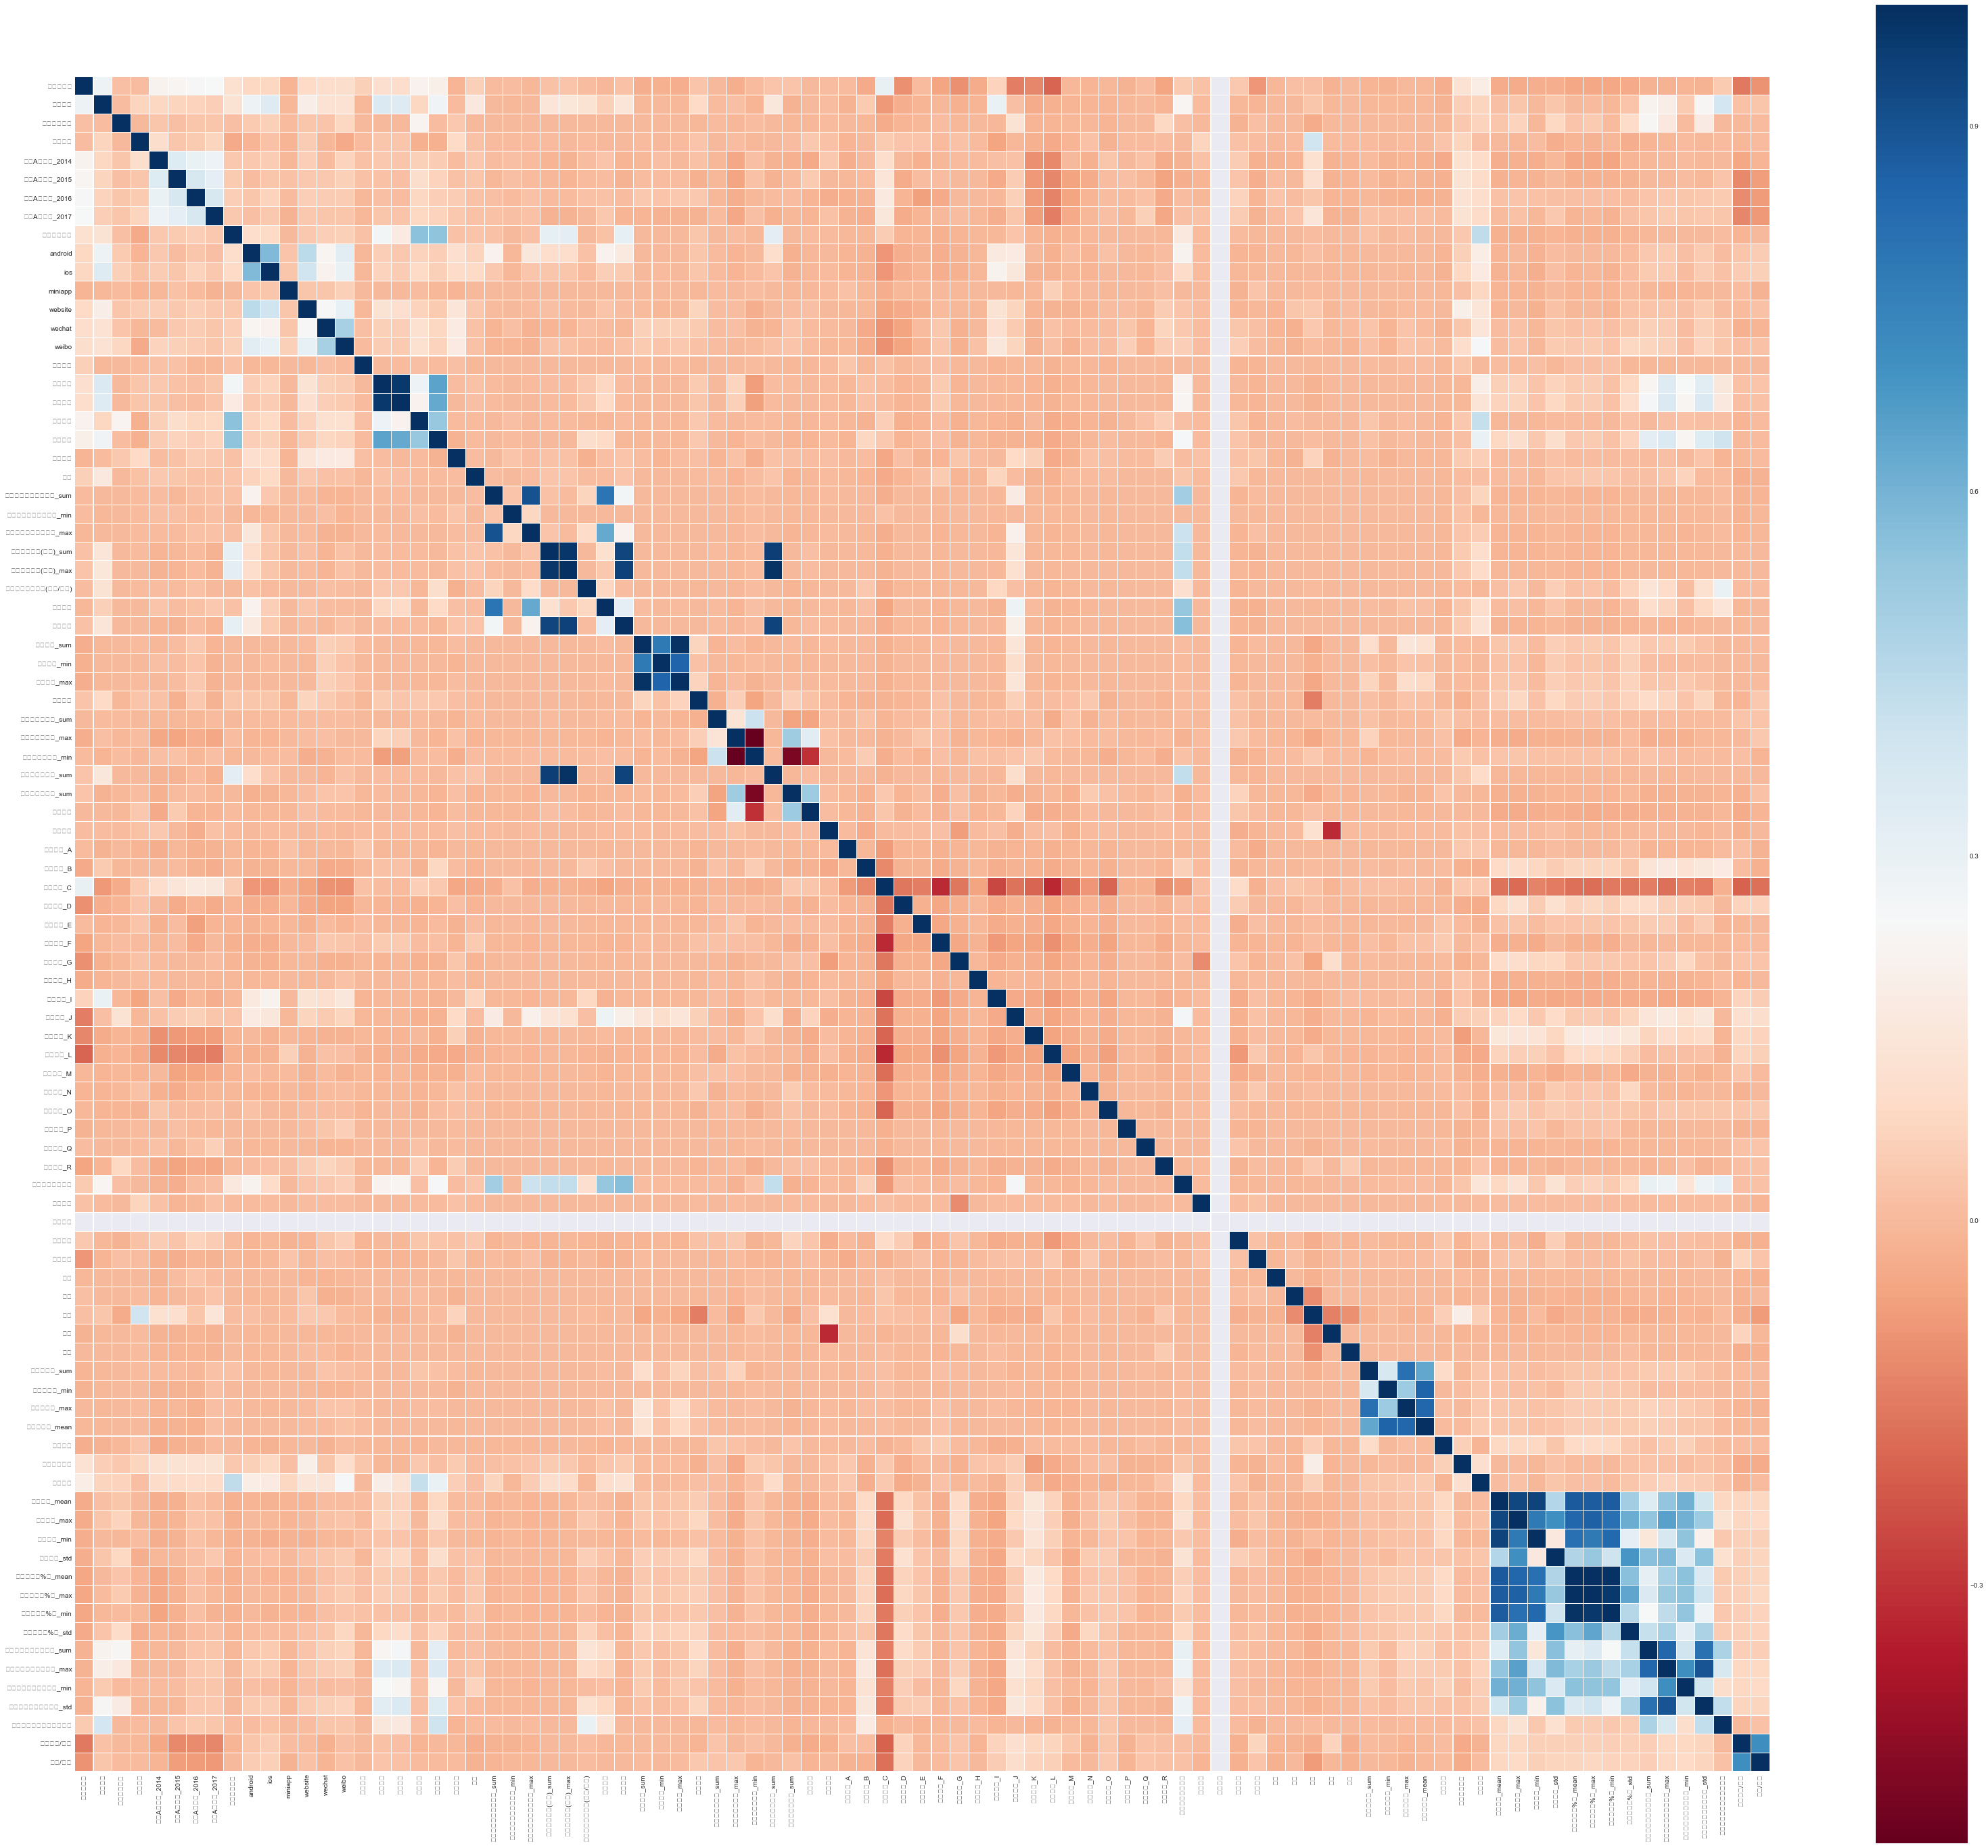

In [30]:
noFinacialFeatures_drop = noFinacialFeatures.drop(['企业编号'], axis=1)
colormap = plt.cm.RdBu
plt.figure(figsize=(50, 50))
sns.heatmap(noFinacialFeatures_drop.corr(),
            linewidths=0.1,
            vmax=1.0,
            square=True,
            cmap=colormap,
            linecolor='white',
            annot=False)

## 财务数据处理

### 资产负债表

In [31]:
df_asset_bpk = pd.read_excel(data_path+r'上市信息财务信息资产负债表.xlsx')
df_asset = df_asset_bpk.copy()

A = ['资产:货币资金(元)', '资产:长期股权投资(元)', '资产:固定资产(元)', '资产:无形资产(元)', '负债:长期负债合计(元)', '权益:实收资本(或股本)(元)',
     '资产:流动资产合计(元)', '资产:资产总计(元)', '负债:流动负债合计(元)', '负债:负债合计(元)', '权益:股东权益合计(元)']
df_asset = df_asset[~df_asset['权益:股东权益合计(元)'].isin(['正无穷大万亿'])]
df_asset1 = pd.DataFrame({'企业编号': df_asset['企业编号'], '资产:货币资金(元)': df_asset['资产:货币资金(元)'], '资产:长期股权投资(元)': df_asset['资产:长期股权投资(元)'],
                          '资产:固定资产(元)': df_asset['资产:固定资产(元)'], '资产:无形资产(元)': df_asset['资产:无形资产(元)'], '负债:长期负债合计(元)': df_asset['负债:长期负债合计(元)'],
                          '权益:实收资本(或股本)(元)': df_asset['权益:实收资本(或股本)(元)'], '资产:流动资产合计(元)': df_asset['资产:流动资产合计(元)'],
                          '资产:资产总计(元)': df_asset['资产:资产总计(元)'], '负债:流动负债合计(元)': df_asset['负债:流动负债合计(元)'], '负债:负债合计(元)': df_asset['负债:负债合计(元)'],
                          '权益:股东权益合计(元)': df_asset['权益:股东权益合计(元)'],
                          })


for arr in A:
    df_asset1.loc[(df_asset1[arr].str.contains("万") == True), arr] = df_asset1.loc[(
        df_asset1[arr].str.contains("万") == True), arr].str.replace('万', '').astype(float)*0.0001
    df_asset1.loc[(df_asset1[arr].str.contains("亿") == True), arr] = df_asset1.loc[(
        df_asset1[arr].str.contains("亿") == True), arr].str.replace('亿', '').astype(float)*1
for arr in A:
    df_asset1[arr] = pd.to_numeric(df_asset1[arr], errors='coerce')


df_asset1.loc[(df_asset1['资产:货币资金(元)'] > 1718) == True, '资产:货币资金(元)'] = 1718
df_asset1.loc[(df_asset1['资产:长期股权投资(元)'] > 5700)
              == True, '资产:长期股权投资(元)'] = 5700
df_asset1.loc[(df_asset1['资产:固定资产(元)'] > 6900) == True, '资产:固定资产(元)'] = 6900
df_asset1.loc[(df_asset1['资产:无形资产(元)'] > 1800) == True, '资产:无形资产(元)'] = 1800
df_asset1.loc[(df_asset1['负债:长期负债合计(元)'] > 3994)
              == True, '负债:长期负债合计(元)'] = 3994
df_asset1.loc[(df_asset1['权益:实收资本(或股本)(元)'] > 3564)
              == True, '权益:实收资本(或股本)(元)'] = 3564
df_asset1.loc[(df_asset1['资产:流动资产合计(元)'] > 13264)
              == True, '资产:流动资产合计(元)'] = 13264
df_asset1.loc[(df_asset1['资产:资产总计(元)'] > 38981) == True, '资产:资产总计(元)'] = 38981
df_asset1.loc[(df_asset1['负债:流动负债合计(元)'] > 10441)
              == True, '负债:流动负债合计(元)'] = 10441
df_asset1.loc[(df_asset1['负债:负债合计(元)'] > 259172)
              == True, '负债:负债合计(元)'] = 259172
df_asset1.loc[(df_asset1['权益:股东权益合计(元)'] > 22808)
              == True, '权益:股东权益合计(元)'] = 22808
for arr in A:
    df_asset1[arr+"滚动增长率"] = df_asset1.groupby(["企业编号"])[arr].pct_change()


agg_func1 = {'资产:流动资产合计(元)': ['mean', 'max', 'min', 'std'], '资产:流动资产合计(元)滚动增长率': ['mean'],
             '资产:资产总计(元)': ['mean', 'max', 'min', 'std'], '资产:资产总计(元)滚动增长率': ['mean'],
             '负债:流动负债合计(元)': ['mean', 'max', 'min', 'std'], '负债:流动负债合计(元)滚动增长率': ['mean'],
             '负债:负债合计(元)': ['mean', 'max', 'min', 'std'], '负债:负债合计(元)滚动增长率': ['mean'],
             '权益:股东权益合计(元)': ['mean', 'max', 'min', 'std'], '权益:股东权益合计(元)滚动增长率': ['mean'],
             '资产:货币资金(元)': ['mean', 'max', 'min', 'std'], '资产:货币资金(元)滚动增长率': ['mean'],
             '资产:长期股权投资(元)': ['mean', 'max', 'min', 'std'], '资产:长期股权投资(元)滚动增长率': ['mean'],
             '资产:固定资产(元)': ['mean', 'max', 'min', 'std'], '资产:固定资产(元)滚动增长率': ['mean'],
             '资产:无形资产(元)': ['mean', 'max', 'min', 'std'], '资产:无形资产(元)滚动增长率': ['mean'],
             '权益:实收资本(或股本)(元)': ['mean', 'max', 'min', 'std'], '权益:实收资本(或股本)(元)滚动增长率': ['mean'], }
df_asset1_new = df_asset1.groupby(['企业编号']).agg(agg_func1)
df_asset1_new.columns = ['_'.join(col) for col in df_asset1_new.columns.values]
df_asset1_new.columns = [
    '资产:流动资产合计(元)_mean', '资产:流动资产合计(元)_max', '资产:流动资产合计(元)_min', '资产:流动资产合计(元)_std', '资产:流动资产合计(元)滚动增长_mean',
    '资产:资产总计(元)_mean', '资产:资产总计(元)_max', '资产:资产总计(元)_min', '资产:资产总计(元)_std', '资产:资产总计(元)滚动增长_mean',
    '负债:流动负债合计(元)_mean', '负债:流动负债合计(元)_max', '负债:流动负债合计(元)_min', '负债:流动负债合计(元)_std', '负债:流动负债合计(元)滚动增长_mean',
    '负债:负债合计(元)_mean', '负债:负债合计(元)_max', '负债:负债合计(元)_min', '负债:负债合计(元)_std', '负债:负债合计(元)滚动增长_mean',
    '权益:股东权益合计(元)_mean', '权益:股东权益合计(元)_max', '权益:股东权益合计(元)_min', '权益:股东权益合计(元)_std', '权益:股东权益合计(元)滚动增长_mean',
    '资产:货币资金(元)_mean', '资产:货币资金(元)_max', '资产:货币资金(元)_min', '资产:货币资金(元)_std', '资产:货币资金(元)滚动增长_mean',
    '资产:长期股权投资(元)_mean', '资产:长期股权投资(元)_max', '资产:长期股权投资(元)_min', '资产:长期股权投资(元)_std', '资产:长期股权投资(元)滚动增长_mean',
    '资产:固定资产(元)_mean', '资产:固定资产(元)_max', '资产:固定资产(元)_min', '资产:固定资产(元)_std', '资产:固定资产(元)滚动增长_mean',
    '资产:无形资产(元)_mean', '资产:无形资产(元)_max', '资产:无形资产(元)_min', '资产:无形资产(元)_std', '资产:无形资产(元)滚动增长_mean',
    '权益:实收资本(或股本)(元)_mean', '权益:实收资本(或股本)(元)_max', '权益:实收资本(或股本)(元)_min', '权益:实收资本(或股本)(元)__std', '权益:实收资本(或股本)(元)滚动增长_mean', ]
df_asset1_new.loc[(df_asset1_new['资产:长期股权投资(元)滚动增长_mean'] ==
                   np.inf) == True, '资产:长期股权投资(元)滚动增长_mean'] = np.nan
df_asset1_new.loc[(df_asset1_new['资产:长期股权投资(元)滚动增长_mean'] ==
                   -np.inf) == True, '资产:长期股权投资(元)滚动增长_mean'] = np.nan
df_asset1_new.loc[(df_asset1_new['权益:实收资本(或股本)(元)滚动增长_mean']
                   == np.inf) == True, '权益:实收资本(或股本)(元)滚动增长_mean'] = np.nan
df_asset1_new.loc[(df_asset1_new['权益:实收资本(或股本)(元)滚动增长_mean'] ==
                   -np.inf) == True, '权益:实收资本(或股本)(元)滚动增长_mean'] = np.nan
df_asset1_new.fillna(df_asset1_new.mean(), inplace=True)

df_asset1_new_merge = df_base.merge(
    df_asset1_new, how='left', right_index=True, left_on="企业编号")

f_res['资产负债表'] = df_asset1_new_merge

### 利润表

In [32]:
df_profit_bpk = pd.read_excel(data_path+r'上市信息财务信息-利润表.xlsx')
df_profit = df_profit_bpk.copy()
B = ['营业成本(元)', '销售费用(元)', '财务费用(元)', '管理费用(元)', '投资收益(元)',
     '营业利润(元)', '利润总额(元)', '归属母公司所有者净利润(元)']

for arr in B:
    df_profit.loc[(df_profit[arr].str.contains("万") == True), arr] = df_profit.loc[(
        df_profit[arr].str.contains("万") == True), arr].str.replace('万', '').astype(float)*10000
    df_profit.loc[(df_profit[arr].str.contains("亿") == True), arr] = df_profit.loc[(
        df_profit[arr].str.contains("亿") == True), arr].str.replace('亿', '').astype(float)*100000000
    df_profit[arr] = pd.to_numeric(df_profit[arr], errors='coerce')
df_profit1 = df_profit.drop(
    ['标题', '日期', '营业收入(元)', '资产减值损失(元)', '资产减值损失(元)', '所得税(元)'], axis=1)
for arr in B:
    df_profit1[arr+"滚动增长率"] = df_profit1.groupby(["企业编号"])[arr].pct_change()

agg_func2 = {
    '营业成本(元)':  ['mean', 'max', 'min', 'std'], '营业成本(元)滚动增长率':  ['mean'],
    '营业利润(元)': ['mean', 'max', 'min', 'std'], '营业利润(元)滚动增长率':  ['mean'],
    '利润总额(元)': ['mean', 'max', 'min', 'std'], '利润总额(元)滚动增长率':  ['mean'],
    '销售费用(元)': ['mean', 'max', 'min', 'std'], '销售费用(元)滚动增长率':  ['mean'],
    '财务费用(元)':  ['mean', 'max', 'min', 'std'], '财务费用(元)滚动增长率':  ['mean'],
    '管理费用(元)': ['mean', 'max', 'min', 'std'], '管理费用(元)滚动增长率':  ['mean'],
    '投资收益(元)': ['mean', 'max', 'min', 'std'], '投资收益(元)滚动增长率':  ['mean'],
}
df_profit1_new = df_profit1.groupby(['企业编号']).agg(agg_func2)
df_profit1_new.columns = ['_'.join(col)
                          for col in df_profit1_new.columns.values]
df_profit1_new.columns = [
    '营业成本(元)_mean', '营业成本(元)_max', '营业成本(元)_min', '营业成本(元)_std', '营业成本(元)滚动增长_mean',
    '营业利润(元)_mean', '营业利润(元)_max', '营业利润(元)_min', '营业利润(元)_std', '营业利润(元)滚动增长_mean',
    '利润总额(元)_mean', '利润总额(元)_max', '利润总额(元)_min', '利润总额(元)_std', '利润总额(元)滚动增长_mean',
    '销售费用(元)_mean', '销售费用(元)_max', '销售费用(元)_min', '销售费用(元)_std', '销售费用(元)滚动增长_mean',
    '财务费用(元)_mean', '财务费用(元)_max', '财务费用(元)_min', '财务费用(元)_std', '财务费用(元)滚动增长_mean',
    '管理费用(元)_mean', '管理费用(元)_max', '管理费用(元)_min', '管理费用(元)_std', '管理费用(元)滚动增长_mean',
    '投资收益(元)_mean', '投资收益(元)_max', '投资收益(元)_min', '投资收益(元)_std', '投资收益(元)滚动增长_mean']
df_profit1_new.loc[(df_profit1_new['投资收益(元)滚动增长_mean'] ==
                    np.inf) == True, '投资收益(元)滚动增长_mean'] = np.nan
df_profit1_new.loc[(df_profit1_new['投资收益(元)滚动增长_mean'] ==
                    -np.inf) == True, '投资收益(元)滚动增长_mean'] = np.nan
df_profit1_new.loc[(df_profit1_new['管理费用(元)滚动增长_mean'] ==
                    np.inf) == True, '管理费用(元)滚动增长_mean'] = np.nan
df_profit1_new.loc[(df_profit1_new['营业成本(元)滚动增长_mean'] ==
                    np.inf) == True, '营业成本(元)滚动增长_mean'] = np.nan
df_profit1_new.loc[(df_profit1_new['销售费用(元)滚动增长_mean'] ==
                    np.inf) == True, '销售费用(元)滚动增长_mean'] = np.nan
df_profit1_new.fillna(df_profit1_new.mean(), inplace=True)

df_profit1_new_merge = df_base.merge(
    df_profit1_new, how='left', right_index=True, left_on="企业编号")

f_res['利润表'] = df_profit1_new_merge

### 现金流量表

In [33]:
df_cash_bpk = pd.read_excel(data_path+r'上市信息财务信息-现金流量表.xlsx')
df_cash = df_cash_bpk.copy()

df_cash1 = pd.DataFrame({'企业编号': df_cash['企业编号'], '经营流入': df_cash['经营:经营活动现金流入小计(元)'],
                         '经营净额': df_cash['经营:经营活动产生的现金流量净额(元)'], '投资流出': df_cash['投资:投资活动现金流出小计(元)'], '投资净额': df_cash['投资:投资活动产生的现金流量净额(元)'],
                         '筹资流入': df_cash['筹资:筹资活动现金流入小计(元)'], '筹资净额': df_cash['筹资活动产生的现金流量净额(元)'], })
C = ['经营流入', '经营净额', '投资流出', '投资净额', '筹资流入', '筹资净额']


for arr in C:
    df_cash1.loc[(df_cash1[arr].str.contains("万") == True), arr] = df_cash1.loc[(
        df_cash1[arr].str.contains("万") == True), arr].str.replace('万', '').astype(float)*0.0001
    df_cash1.loc[(df_cash1[arr].str.contains("亿") == True), arr] = df_cash1.loc[(
        df_cash1[arr].str.contains("亿") == True), arr].str.replace('亿', '').astype(float)*1
    df_cash1[arr] = pd.to_numeric(df_cash1[arr], errors='coerce')
    df_cash1[arr+"滚动增长率"] = df_cash1.groupby(["企业编号"])[arr].pct_change()

agg_func3 = {
    '经营流入':  ['mean', 'max', 'min', 'std'], '经营流入滚动增长率':  ['mean'],
    '经营净额': ['mean', 'max', 'min', 'std'], '经营净额滚动增长率':  ['mean'],
    '投资流出': ['mean', 'max', 'min', 'std'], '投资流出滚动增长率':  ['mean'],
    '投资净额': ['mean', 'max', 'min', 'std'], '投资净额滚动增长率':  ['mean'],
    '筹资流入': ['mean', 'max', 'min', 'std'], '筹资流入滚动增长率':  ['mean'],
    '筹资净额':  ['mean', 'max', 'min', 'std'], '筹资净额滚动增长率':  ['mean'],
}
df_cash1_new = df_cash1.groupby(['企业编号']).agg(agg_func3)
df_cash1_new.columns = ['_'.join(col) for col in df_cash1_new.columns.values]
df_cash1_new.columns = [
    '经营流入_mean', '经营流入_max', '经营流入_min', '经营流入_std', '经营流入滚动增长_mean',
    '经营净额_mean', '经营净额_max', '经营净额_min', '经营净额_std', '经营净额滚动增长_mean',
    '投资流出_mean', '投资流出_max', '投资流出_min', '投资流出_std', '投资流出滚动增长_mean',
    '投资净额_mean', '投资净额_max', '投资净额_min', '投资净额_std', '投资净额滚动增长_mean',
    '筹资流入_mean', '筹资流入_max', '筹资流入_min', '筹资流入_std', '筹资流入滚动增长_mean',
    '筹资净额_mean', '筹资净额_max', '筹资净额_min', '筹资净额_std', '筹资净额滚动增长_mean', ]
df_cash1_new.loc[(df_cash1_new['筹资流入滚动增长_mean'] == np.inf)
                 == True, '筹资流入滚动增长_mean'] = np.nan
df_cash1_new.loc[(df_cash1_new['筹资流入滚动增长_mean'] == -np.inf)
                 == True, '筹资流入滚动增长_mean'] = np.nan
df_cash1_new.loc[(df_cash1_new['筹资净额滚动增长_mean'] == np.inf)
                 == True, '筹资净额滚动增长_mean'] = np.nan
df_cash1_new.loc[(df_cash1_new['筹资净额滚动增长_mean'] == -np.inf)
                 == True, '筹资净额滚动增长_mean'] = np.nan
df_cash1_new.loc[(df_cash1_new['投资流出滚动增长_mean'] == np.inf)
                 == True, '投资流出滚动增长_mean'] = np.nan
df_cash1_new.loc[(df_cash1_new['投资净额滚动增长_mean'] == -np.inf)
                 == True, '投资净额滚动增长_mean'] = np.nan
df_cash1_new.fillna(df_cash1_new.mean(), inplace=True)

df_cash1_new_merge = df_base.merge(
    df_cash1_new, how='left', right_index=True, left_on="企业编号")

f_res['现金流量表'] = df_cash1_new_merge

### 每股指标

In [34]:
df_meiguzhibiao_bpk = pd.read_excel(data_path+r'上市公司财务信息-每股指标.xlsx')
df_meiguzhibiao = df_meiguzhibiao_bpk.copy()
df_meiguzhibiao1 = df_meiguzhibiao.drop(['标题', '日期', '稀释每股收益(元)'], axis=1)
D = ['基本每股收益(元)', '每股净资产(元)', '每股公积金(元)', '每股未分配利润(元)', '每股经营现金流(元)']
for arr in D:
    df_meiguzhibiao1[arr] = pd.to_numeric(
        df_meiguzhibiao1[arr], errors='coerce')
    df_meiguzhibiao1[arr +
                     "滚动增长率"] = df_meiguzhibiao1.groupby(["企业编号"])[arr].pct_change()

agg_func4 = {
    '基本每股收益(元)':  ['mean', 'max', 'min', 'std'], '基本每股收益(元)滚动增长率':  ['mean'],
    '每股净资产(元)': ['mean', 'max', 'min', 'std'], '每股净资产(元)滚动增长率':  ['mean'],
    '每股未分配利润(元)': ['mean', 'max', 'min', 'std'], '每股未分配利润(元)滚动增长率':  ['mean'],
    '每股经营现金流(元)':  ['mean', 'max', 'min', 'std'], '每股经营现金流(元)滚动增长率':  ['mean'],
    '每股公积金(元)':  ['mean', 'max', 'min', 'std'],
}
df_meiguzhibiao1_new = df_meiguzhibiao1.groupby(['企业编号']).agg(agg_func4)
df_meiguzhibiao1_new.columns = [
    '_'.join(col) for col in df_meiguzhibiao1_new.columns.values]
df_meiguzhibiao1_new.columns = [
    '基本每股收益(元)_mean', '基本每股收益(元)_max', '基本每股收益(元)_min', '基本每股收益(元)_std', '基本每股收益(元)滚动增长_mean',
    '每股净资产(元)_mean', '每股净资产(元)_max', '每股净资产(元)_min', '每股净资产(元)_std', '每股净资产(元)滚动增长_mean',
    '每股未分配利润(元)_mean', '每股未分配利润(元)_max', '每股未分配利润(元)_min', '每股未分配利润(元)_std', '每股未分配利润(元)滚动增长_mean',
    '每股经营现金流(元)_mean', '每股经营现金流(元)_max', '每股经营现金流(元)_min', '每股经营现金流(元)_std', '每股经营现金流(元)滚动增长_mean', '每股公积金(元)_mean', '每股公积金(元)_max', '每股公积金(元)_min', '每股公积金(元)_std']
df_meiguzhibiao1_new.loc[(df_meiguzhibiao1_new['基本每股收益(元)滚动增长_mean']
                          == np.inf) == True, '基本每股收益(元)滚动增长_mean'] = np.nan
df_meiguzhibiao1_new.loc[(df_meiguzhibiao1_new['每股经营现金流(元)滚动增长_mean']
                          == np.inf) == True, '每股经营现金流(元)滚动增长_mean'] = np.nan
df_meiguzhibiao1_new.loc[(df_meiguzhibiao1_new['基本每股收益(元)滚动增长_mean']
                          == -np.inf) == True, '基本每股收益(元)滚动增长_mean'] = np.nan
df_meiguzhibiao1_new.loc[(df_meiguzhibiao1_new['每股经营现金流(元)滚动增长_mean']
                          == -np.inf) == True, '每股经营现金流(元)滚动增长_mean'] = np.nan
df_meiguzhibiao1_new.fillna(df_meiguzhibiao1_new.mean(), inplace=True)

df_meiguzhibiao1_new_merge = df_base.merge(
    df_meiguzhibiao1_new, how='left', right_index=True, left_on="企业编号")

f_res['每股指标'] = df_meiguzhibiao1_new_merge

### 成长能力指标

In [35]:
df_growth_bpk = pd.read_excel(data_path+r'上市信息财务信息-成长能力指标.xlsx')
df_growth = df_growth_bpk.copy()
df_growth = df_growth.drop(
    ['标题', '日期', '扣非净利润(元)', '归属净利润同比增长(元)', '扣非净利润滚动环比增长(元)'], axis=1)
E = ['营业总收入(元)', '毛利润(元)', '归属净利润(元)']
for arr in E:
    df_growth.loc[(df_growth[arr].str.contains("万亿") == True), arr] = df_growth.loc[(
        df_growth[arr].str.contains("万亿") == True), arr].str.replace('万亿', '').astype(float)*1000000000000
    df_growth.loc[(df_growth[arr].str.contains("万") == True), arr] = df_growth.loc[(
        df_growth[arr].str.contains("万") == True), arr].str.replace('万', '').astype(float)*10000
    df_growth.loc[(df_growth[arr].str.contains("亿") == True), arr] = df_growth.loc[(
        df_growth[arr].str.contains("亿") == True), arr].str.replace('亿', '').astype(float)*100000000
F = ['营业总收入同比增长(元)', '扣非净利润同比增长(元)', '营业总收入滚动环比增长(元)', '归属净利润滚动环比增长(元)']
for arr in F:
    df_growth[arr] = df_growth[arr].replace('--%', np.nan)
for arr in F:
    df_growth.loc[(df_growth[arr].str.contains("%") == True), arr] = df_growth.loc[(
        df_growth[arr].str.contains("%") == True), arr].str.replace(',', '').str.rstrip('%').astype(float)/100
df_growth = df_growth.convert_objects(convert_numeric=True)

agg_func5 = {
    '营业总收入(元)':   ['mean', 'max', 'min', 'std'],
    '归属净利润(元)':  ['mean', 'max', 'min', 'std'],
    '营业总收入同比增长(元)':  ['mean', 'max', 'min', 'std'],
    '扣非净利润同比增长(元)':   ['mean', 'max', 'min', 'std'],
    '毛利润(元)': ['mean', 'max', 'min', 'std'],
    '营业总收入滚动环比增长(元)':  ['mean'], '归属净利润滚动环比增长(元)':  ['mean'],
}
df_growth_new = df_growth.groupby(['企业编号']).agg(agg_func5)
df_growth_new.columns = ['_'.join(col) for col in df_growth_new.columns.values]
df_growth_new.columns = [
    '营业总收入(元)_mean', '营业总收入(元)_max', '营业总收入(元)_min', '营业总收入(元)_std',
    '归属净利润(元)_mean', '归属净利润(元)_max', '归属净利润(元)_min',  '归属净利润(元)_std',
    '营业总收入同比增长(元)_mean', '营业总收入同比增长(元)_max', '营业总收入同比增长(元)_min', '营业总收入同比增长(元)_std',
    '扣非净利润同比增长(元)_mean', '扣非净利润同比增长(元)_max', '扣非净利润同比增长(元)_min', '扣非净利润同比增长(元)_std',
    '毛利润(元)_mean', '毛利润(元)_max', '毛利润(元)_min', '毛利润(元)_std', '营业总收入滚动环比增长_mean', '归属净利润滚动环比增长_mean']
df_growth_new.fillna(df_growth_new.mean(), inplace=True)

df_growth_new_merge = df_base.merge(
    df_growth_new, how='left', right_index=True, left_on="企业编号")

f_res['成长能力指标'] = df_growth_new_merge

### 盈利能力指标

In [36]:
df_abilityofprofit_bpk = pd.read_excel(data_path+r'上市信息财务信息盈利能力指标.xlsx')
df_abilityofprofit = df_abilityofprofit_bpk.copy()
G = ['加权净资产收益率(%)', '摊薄净资产收益率(%)', '摊薄总资产收益率(%)',
     '毛利率(%)', '净利率(%)', '实际税率(%)']
for arr in G:
    df_abilityofprofit[arr] = df_abilityofprofit[arr].replace('--%', np.nan)
    df_abilityofprofit[arr] = df_abilityofprofit[arr].str.rstrip(
        '%').astype(float)/100
df_abilityofprofit.convert_objects(convert_numeric=True)
df_abilityofprofit = df_abilityofprofit.drop(['标题', '日期'], axis=1)
for arr in G:
    df_abilityofprofit[arr +
                       "滚动增长率"] = df_abilityofprofit.groupby(["企业编号"])[arr].pct_change()

agg_func6 = {
    '加权净资产收益率(%)':  ['mean', 'max', 'min', 'std'], '加权净资产收益率(%)滚动增长率':  ['mean'],
    '毛利率(%)': ['mean', 'max', 'min', 'std'], '毛利率(%)滚动增长率':  ['mean'],
    '净利率(%)':  ['mean', 'max', 'min', 'std'], '净利率(%)滚动增长率':  ['mean'],
    '实际税率(%)':  ['mean', 'max', 'min', 'std'], '实际税率(%)滚动增长率':  ['mean'],
    '摊薄总资产收益率(%)':  ['mean', 'max', 'min', 'std'], '摊薄总资产收益率(%)滚动增长率':  ['mean'],
}
df_abilityofprofit_new = df_abilityofprofit.groupby(['企业编号']).agg(agg_func6)
df_abilityofprofit_new.columns = [
    '_'.join(col) for col in df_abilityofprofit_new.columns.values]
df_abilityofprofit_new.columns = [
    '加权净资产收益率(%)_mean', '加权净资产收益率(%)_max', '加权净资产收益率(%)_min', '加权净资产收益率(%)_std', '加权净资产收益率滚动增长_mean',
    '毛利率(%)_mean', '毛利率(%)_max', '毛利率(%)_min',  '毛利率(%)_std', '毛利率滚动增长_mean',
    '净利率(%)_mean', '净利率(%)_max', '净利率(%)_min', '净利率(%)_std', '净利率滚动增长_mean',
    '实际税率(%)_mean', '实际税率(%)_max', '实际税率(%)_min',  '实际税率(%)_std', '实际税率滚动增长_mean',
    '摊薄总资产收益率(%)_mean', '摊薄总资产收益率(%)_max', '摊薄总资产收益率(%)_min', '摊薄总资产收益率(%)_std', '摊薄总资产收益率滚动增长_mean', ]
df_abilityofprofit_new.loc[(df_abilityofprofit_new['实际税率滚动增长_mean'] == np.inf)
                           == True, '实际税率滚动增长_mean'] = np.nan
df_abilityofprofit_new.loc[(df_abilityofprofit_new['摊薄总资产收益率滚动增长_mean'] == np.inf)
                           == True, '摊薄总资产收益率滚动增长_mean'] = np.nan
df_abilityofprofit_new.loc[(df_abilityofprofit_new['实际税率滚动增长_mean'] == -np.inf)
                           == True, '实际税率滚动增长_mean'] = np.nan
df_abilityofprofit_new.loc[(df_abilityofprofit_new['摊薄总资产收益率滚动增长_mean']
                            == -np.inf) == True, '摊薄总资产收益率滚动增长_mean'] = np.nan
df_abilityofprofit_new.loc[(df_abilityofprofit_new['加权净资产收益率滚动增长_mean']
                            == -np.inf) == True, '加权净资产收益率滚动增长_mean'] = np.nan
df_abilityofprofit_new.loc[(df_abilityofprofit_new['净利率滚动增长_mean'] == np.inf)
                           == True, '净利率滚动增长_mean'] = np.nan
df_abilityofprofit_new.loc[(df_abilityofprofit_new['加权净资产收益率滚动增长_mean']
                            == np.inf) == True, '加权净资产收益率滚动增长_mean'] = np.nan
df_abilityofprofit_new.fillna(df_abilityofprofit_new.mean(), inplace=True)

df_abilityofprofit_new_merge = df_base.merge(
    df_abilityofprofit_new, how='left', right_index=True, left_on="企业编号")

f_res['盈利能力能力'] = df_abilityofprofit_new_merge

### 财务风险指标

In [37]:
df_risk_bpk = pd.read_excel(data_path+r'上市信息财务信息-财务风险指标.xlsx')
df_risk = df_risk_bpk.copy()
H = ['流动比率', '速动比率']
for arr in H:
    df_risk[arr] = pd.to_numeric(df_risk[arr], errors='coerce')
I = ['资产负债率(%)', '流动负债/总负债(%)']
for arr in I:
    df_risk[arr] = df_risk[arr].replace('--%', np.nan)
df_risk.convert_objects(convert_numeric=True)
for arr in I:
    df_risk[arr] = df_risk[arr].str.rstrip('%').astype(float)/100
df_risk.convert_objects(convert_numeric=True)
df_risk = df_risk.drop(['标题', '日期', '速动比率'], axis=1)
df_risk = df_risk.loc[df_risk['流动比率'] < 66.6]
df_risk = df_risk.loc[df_risk['资产负债率(%)'] < 2.93]
for arr in I:
    df_risk[arr+'滚动增长率'] = df_risk.groupby(['企业编号'])[arr].pct_change()
df_risk['流动比率滚动增长率'] = df_risk.groupby(['企业编号'])['流动比率'].pct_change()

agg_func7 = {
    '资产负债率(%)':   ['mean', 'max', 'min', 'std'], '资产负债率(%)滚动增长率':  ['mean'],
    '流动负债/总负债(%)': ['mean', 'max', 'min', 'std'], '流动负债/总负债(%)滚动增长率':  ['mean'],
    '流动比率':  ['mean', 'max', 'min', 'std'], '流动比率滚动增长率':  ['mean'],
}
df_risk_new = df_risk.groupby(['企业编号']).agg(agg_func7)
df_risk_new.columns = ['_'.join(col) for col in df_risk_new.columns.values]
df_risk_new.columns = [
    '资产负债率_mean', '资产负债率_max', '资产负债率_min', '资产负债率_std', '资产负债率滚动增长_mean',
    '流动负债/总负债_mean', '流动负债/总负债_max', '流动负债/总负债_min', '流动负债/总负债_std', '流动负债/总负债滚动增长_mean',
    '流动比率_mean', '流动比率_max', '流动比率_min', '流动比率_std', '流动比率滚动增长_mean', ]
df_risk_new.fillna(df_risk_new.mean(), inplace=True)

df_risk_new_merge = df_base.merge(
    df_risk_new, how='left', right_index=True, left_on="企业编号")
df_risk_new_merge.fillna(df_risk_new_merge.mean(), inplace=True)

f_res['财务风险能力'] = df_risk_new_merge

### 运营能力指标

In [38]:
df_operation_bpk = pd.read_excel(data_path+r'上市信息财务信息运营能力指标.xlsx')
df_operation = df_operation_bpk.copy()
J = ['总资产周转率(次)', '应收账款周转天数(天)', '存货周转天数(天)']
for arr in J:
    df_operation[arr] = pd.to_numeric(df_operation[arr], errors='coerce')
df_operation = df_operation.drop(['标题', '日期'], axis=1)
df_operation = df_operation.loc[df_operation['应收账款周转天数(天)'] > 0]
df_operation = df_operation.loc[(df_operation['存货周转天数(天)'] > 0) & (
    df_operation['存货周转天数(天)'] < 600000)]
for arr in J:
    df_operation[arr +
                 "滚动增长率"] = df_operation.groupby(["企业编号"])[arr].pct_change()

agg_func8 = {
    '总资产周转率(次)':  ['mean', 'max', 'min', 'std'], '总资产周转率(次)滚动增长率': ['mean'],
    '应收账款周转天数(天)': ['mean', 'max', 'min', 'std'], '应收账款周转天数(天)滚动增长率': ['mean'],
    '存货周转天数(天)': ['mean', 'max', 'min', 'std'], '存货周转天数(天)滚动增长率': ['mean'],
}
df_operation_new = df_operation.groupby(['企业编号']).agg(agg_func8)
df_operation_new.columns = ['_'.join(col)
                            for col in df_operation_new.columns.values]
df_operation_new.columns = [
    '总资产周转率(次)_mean', '总资产周转率(次)_max', '总资产周转率(次)_min', '总资产周转率(次)_std', '总资产周转率(次)滚动增长_mean',
    '应收账款周转天数(天)_mean', '应收账款周转天数(天)_max', '应收账款周转天数(天)_min', '应收账款周转天数(天)_std', '应收账款周转天数(天)滚动增长_mean',
    '存货周转天数(天)_mean', '存货周转天数(天)_max', '存货周转天数(天)_min', '存货周转天数(天)_std', '存货周转天数(天)滚动增长_mean']
df_operation_new.loc[(
    df_operation_new['总资产周转率(次)滚动增长_mean'] == np.inf) == True, '总资产周转率(次)滚动增长_mean'] = np.nan
df_operation_new.fillna(df_operation_new.mean(), inplace=True)

df_operation_new_merge = df_base.merge(
    df_operation_new, how='left', right_index=True, left_on="企业编号")
df_operation_new_merge.fillna(df_operation_new_merge.mean(), inplace=True)
df_operation_new_merge.min()

企业编号                    1001.000000
总资产周转率(次)_mean             0.004444
总资产周转率(次)_max              0.010000
总资产周转率(次)_min              0.000000
总资产周转率(次)_std              0.007071
总资产周转率(次)滚动增长_mean        -0.538981
应收账款周转天数(天)_mean           0.040000
应收账款周转天数(天)_max            0.040000
应收账款周转天数(天)_min            0.010000
应收账款周转天数(天)_std            0.013973
应收账款周转天数(天)滚动增长_mean      -0.963611
存货周转天数(天)_mean             0.011429
存货周转天数(天)_max              0.020000
存货周转天数(天)_min              0.010000
存货周转天数(天)_std              0.003780
存货周转天数(天)滚动增长_mean        -0.953313
dtype: float64

In [39]:
f_res['运营能力指标'] = df_operation_new_merge

### Check Point

In [40]:
feature_count = 0
for k, v in f_res.items():
    print(k, len(v.columns))
    feature_count += (len(v.columns)-1)
print('total: ', feature_count)

资产负债表 51
利润表 36
现金流量表 31
每股指标 25
成长能力指标 23
盈利能力能力 26
财务风险能力 16
运营能力指标 16
total:  216


In [41]:
FinacialFeatures = df_base
for k, v in f_res.items():
    print(k)
    FinacialFeatures = FinacialFeatures.merge(v, how='left', on='企业编号')
FinacialFeatures.set_index(
    np.arange(0, len(FinacialFeatures)), inplace=True)

资产负债表
利润表
现金流量表
每股指标
成长能力指标
盈利能力能力
财务风险能力
运营能力指标


In [42]:
FinacialFeatures.head(5)

,企业编号,资产:流动资产合计(元)_mean,资产:流动资产合计(元)_max,资产:流动资产合计(元)_min,资产:流动资产合计(元)_std,资产:流动资产合计(元)滚动增长_mean,资产:资产总计(元)_mean,资产:资产总计(元)_max,资产:资产总计(元)_min,资产:资产总计(元)_std,...,应收账款周转天数(天)_mean,应收账款周转天数(天)_max,应收账款周转天数(天)_min,应收账款周转天数(天)_std,应收账款周转天数(天)滚动增长_mean,存货周转天数(天)_mean,存货周转天数(天)_max,存货周转天数(天)_min,存货周转天数(天)_std,存货周转天数(天)滚动增长_mean
0,1001,37.138558,102.982866,-3.422013,45.402146,0.526979,5.236450,10.129814,0.418085,3.678978,...,107.589270,191.707773,63.791689,44.495607,0.151392,414.778035,1089.655763,176.283983,325.371499,1.562757
1,1002,53.649848,102.805115,-40.517576,70.738587,-0.250285,28.653568,44.691555,16.642118,10.948562,...,46.903333,56.590000,39.830000,6.234116,0.023916,6.506667,7.040000,5.010000,0.702335,0.045330
2,1003,-0.078404,23.757798,-18.510366,16.111779,-2.589393,-9.319352,15.939361,-24.609220,17.478754,...,84.275556,139.910000,56.020000,33.143654,-0.040224,54.918889,75.540000,38.010000,11.089465,0.031792
3,1004,43.189113,105.787782,1.316974,47.110533,15.573363,2.084637,7.893039,-2.714605,4.968071,...,26.720000,35.360000,17.290000,6.024438,0.081857,6.954444,7.900000,6.240000,0.618448,0.021711
4,1005,-8.351909,40.883944,-36.417633,32.154606,-0.489689,26.580415,34.378493,19.680974,5.327993,...,94.050000,110.260000,77.850000,9.652235,0.012921,108.584444,357.190000,44.160000,101.728838,0.344086


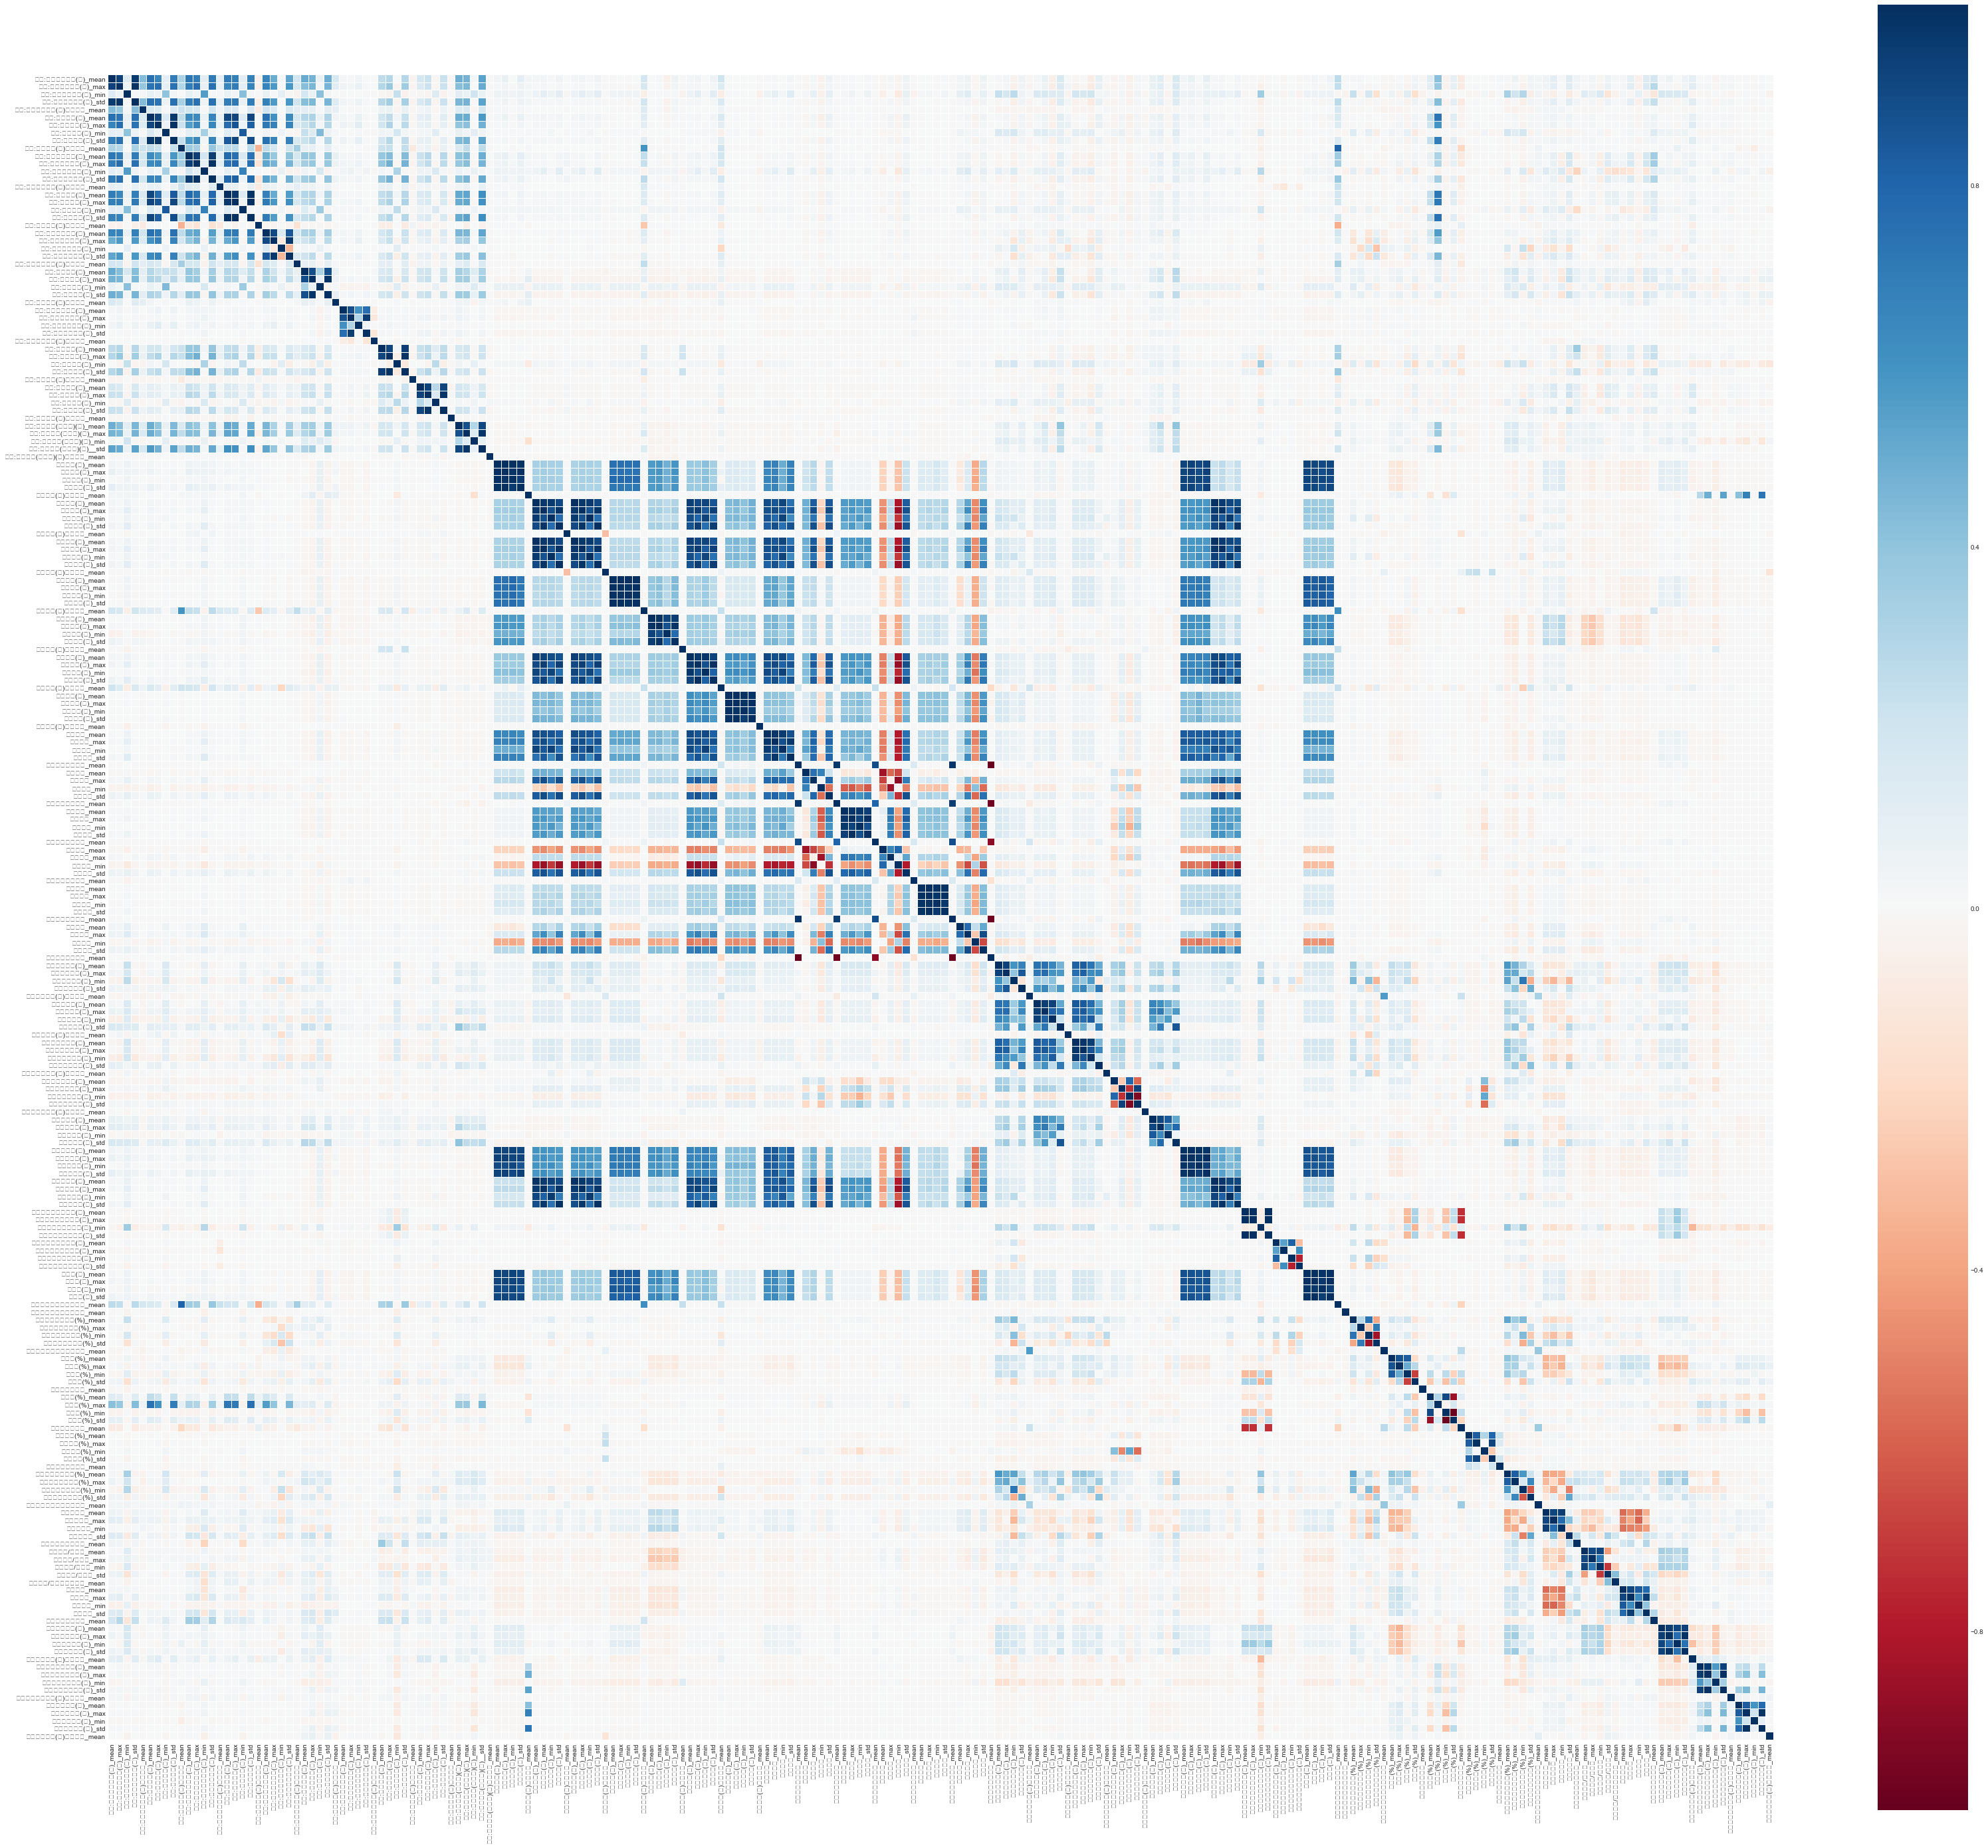

In [43]:
FinacialFeatures_drop = FinacialFeatures.drop(['企业编号'], axis=1)
colormap = plt.cm.RdBu
plt.figure(figsize=(50, 50))
sns.heatmap(FinacialFeatures_drop.corr(),
            linewidths=0.1,
            vmax=1.0,
            square=True,
            cmap=colormap,
            linecolor='white',
            annot=False)

In [44]:
df = noFinacialFeatures.copy()
f_df = FinacialFeatures.copy()

# f_df.drop(['企业总评分'], axis=1, inplace=True)
df = df.merge(f_df, how='left', on='企业编号')
df.head(5)

,企业编号,企业总评分,软著数量,作品著作数量,项目数量,纳税A级年份_2014,纳税A级年份_2015,纳税A级年份_2016,纳税A级年份_2017,资质证书数量,...,应收账款周转天数(天)_mean,应收账款周转天数(天)_max,应收账款周转天数(天)_min,应收账款周转天数(天)_std,应收账款周转天数(天)滚动增长_mean,存货周转天数(天)_mean,存货周转天数(天)_max,存货周转天数(天)_min,存货周转天数(天)_std,存货周转天数(天)滚动增长_mean
0,1001,75.374276,1.0,1.0,1.0,1.0,2.0,1.0,1.0,9.0,...,107.589270,191.707773,63.791689,44.495607,0.151392,414.778035,1089.655763,176.283983,325.371499,1.562757
1,1002,79.830122,2.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,...,46.903333,56.590000,39.830000,6.234116,0.023916,6.506667,7.040000,5.010000,0.702335,0.045330
2,1003,78.318264,2.0,0.0,1.0,1.0,1.0,0.0,1.0,442.0,...,84.275556,139.910000,56.020000,33.143654,-0.040224,54.918889,75.540000,38.010000,11.089465,0.031792
3,1004,83.253376,0.0,6.0,1.0,0.0,0.0,2.0,1.0,1.0,...,26.720000,35.360000,17.290000,6.024438,0.081857,6.954444,7.900000,6.240000,0.618448,0.021711
4,1005,83.291493,6.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,...,94.050000,110.260000,77.850000,9.652235,0.012921,108.584444,357.190000,44.160000,101.728838,0.344086


In [45]:
df.to_csv(r'../../Data/train_data.csv', index=False)